<a href="https://colab.research.google.com/github/nduerksen/FinalProject/blob/main/ML_Red_Wine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret[full]

In [2]:
import pycaret
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import output
output.enable_custom_widget_manager()
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import model_selection
import plotly.express as px


In [3]:
#Retrieving CSV file from Archive and importing into notebook
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [4]:
#Saving CSV data as dataframe wineor
wineor = pd.read_csv('/content/winequality-red.csv',sep=';')
wineor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
#data examination
wineor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#Searching dataset for any missing data
print(wineor.isnull().values.any())

False


In [7]:
#removing duplicated data from dataset
wineor.drop_duplicates(inplace=True)

In [8]:
#reseting and dropping duplicate index
wineor.reset_index(drop=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [9]:
#Examining Data
wineor.describe([0.01, 0.99]).T

,count,mean,std,min,1%,50%,99%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,5.200000,7.9000,13.24200,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.200000,0.5200,1.02920,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.000000,0.2600,0.70420,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.400000,2.2000,8.30000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.042000,0.0790,0.36842,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,3.000000,14.0000,50.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,8.000000,38.0000,145.84000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.991872,0.9967,1.00140,1.00369
pH,1359.0,3.309787,0.155036,2.74000,2.940000,3.3100,3.70420,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.430000,0.6200,1.28000,2.00000


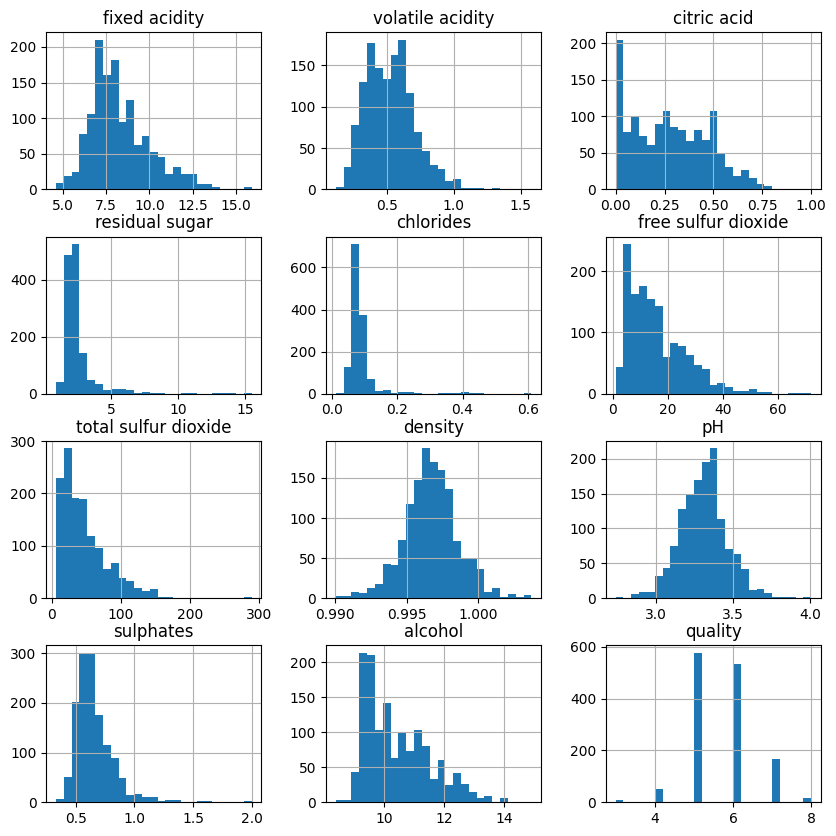

In [10]:
# display histogram of raw data from CSV
wineor.hist(bins=25,figsize=(10,10))
plt.show()

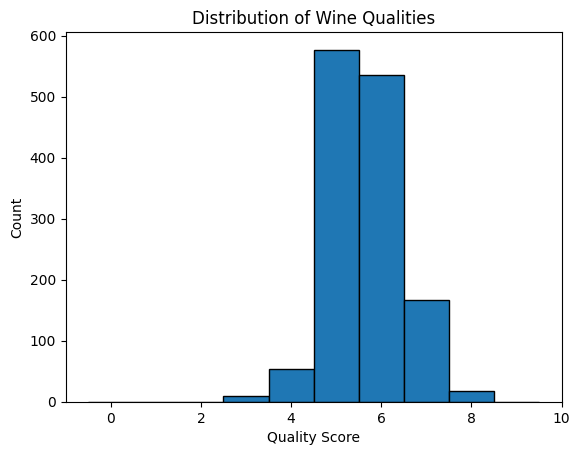

In [11]:
#Raw Quality Data Set
plt.hist(wineor['quality'], bins=range(11), align='left',edgecolor='black')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.title('Distribution of Wine Qualities')
plt.show()

<AxesSubplot: >

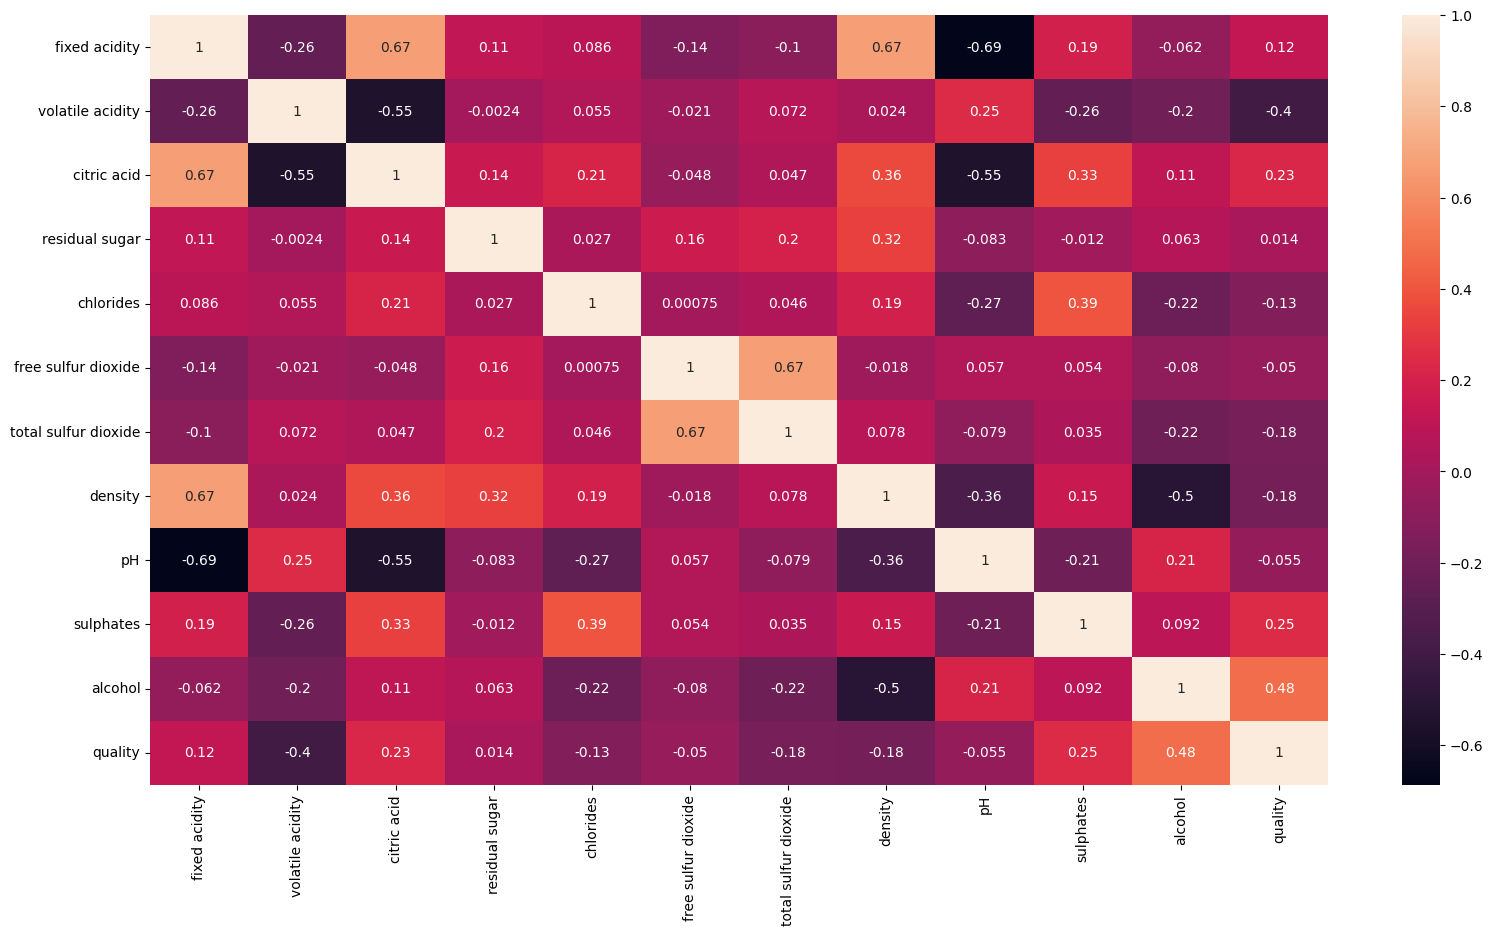

In [12]:
#Visualizing correlation heatmap
plt.figure(figsize=[19,10])
sns.heatmap(wineor.corr(),annot=True)

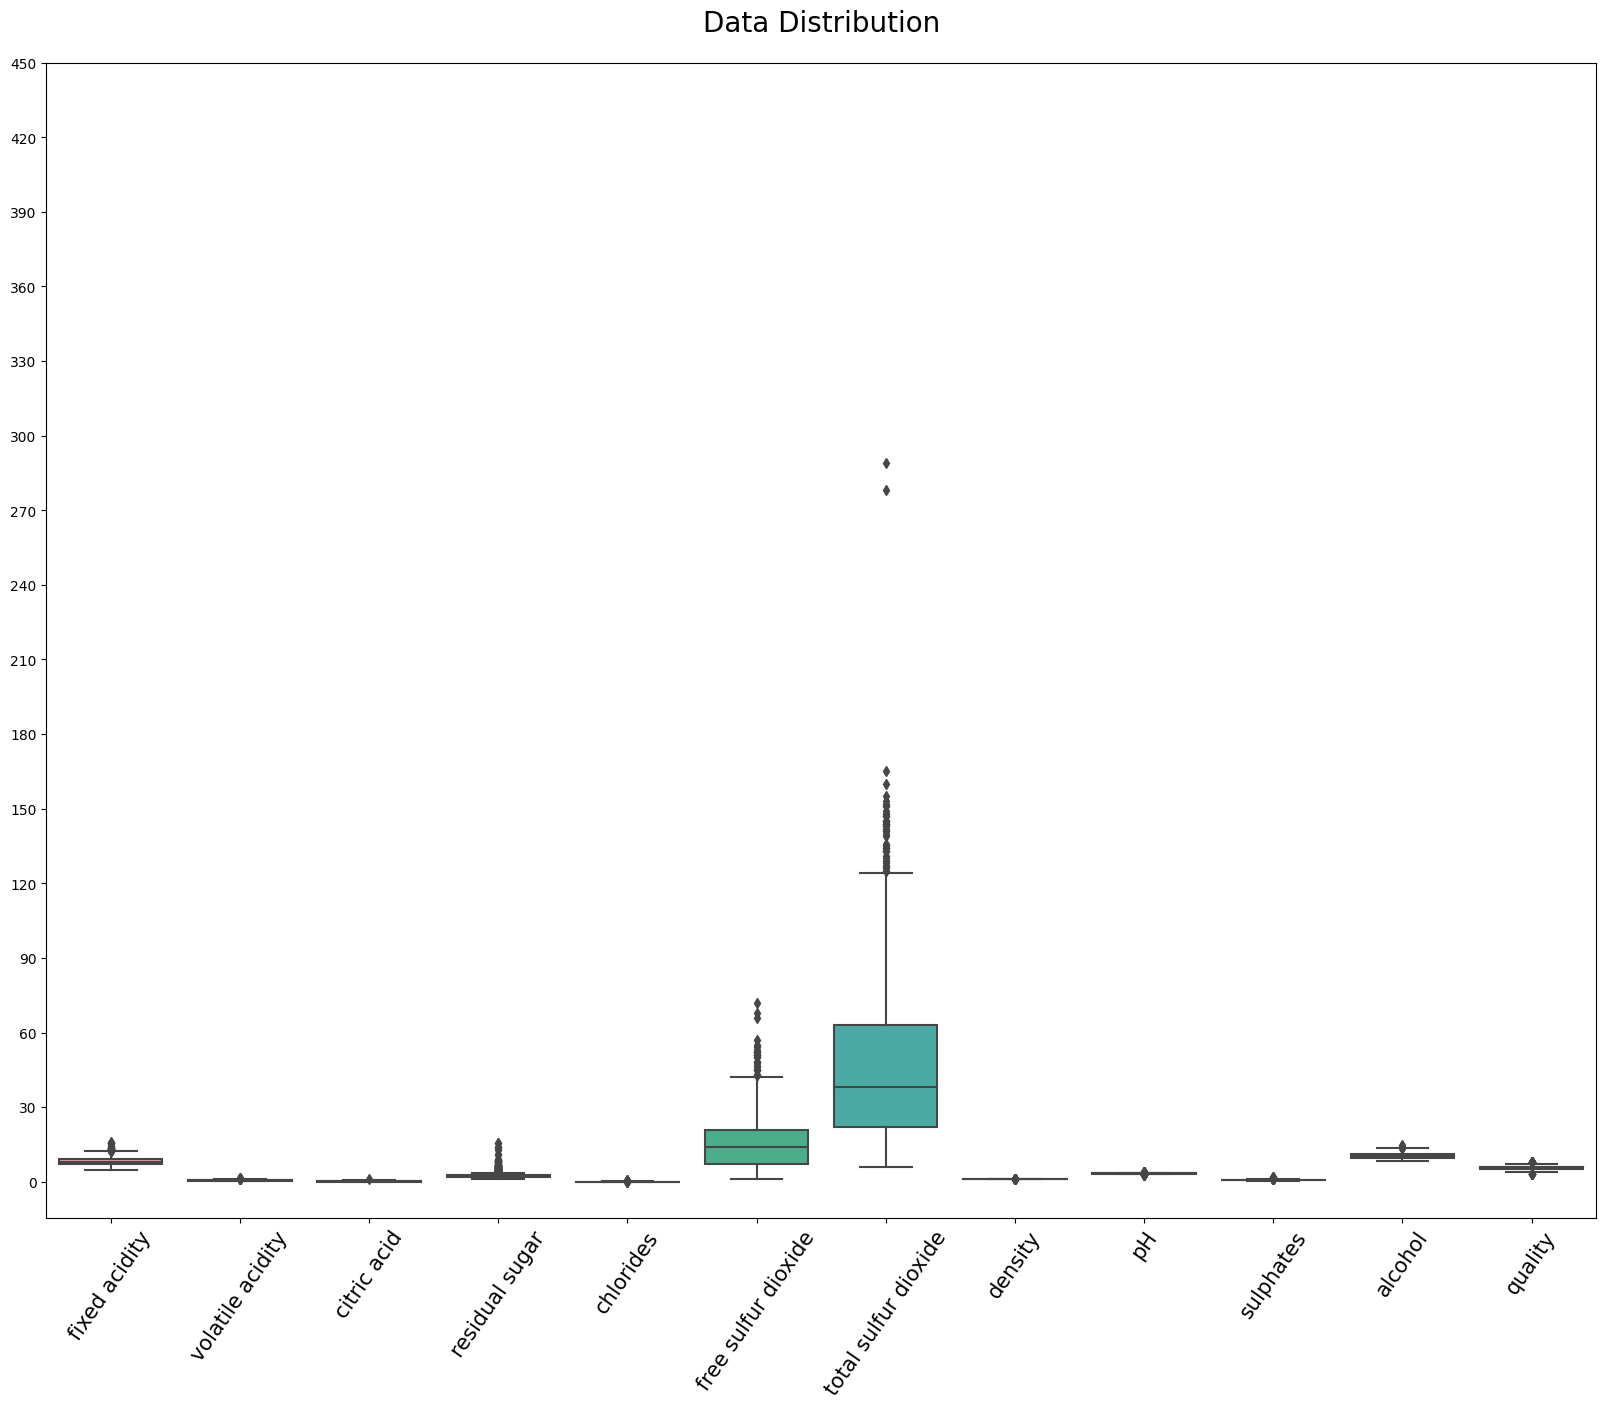

In [13]:
#box plot of raw data to visualize outlying data
plt.figure(figsize=(20,15))
sns.boxplot(data=wineor)
plt.yticks(range(0,460,30))
plt.xticks(size=15, rotation=55)
plt.title('Data Distribution', size=20, y=1.02)
plt.show()

In [14]:
# Calculating the Mahalanobis distance for each data point to identify and outlying data more than 3 SD away from mean
# Storing data with outlying data removed as w_out
distances_o = np.linalg.norm(wineor.iloc[:, :-1].values - np.mean(wineor.iloc[:, :-1].values, axis=0), axis=1)
outliers = np.where(distances_o > 3 * np.std(distances_o), True, False)
w_out = wineor[~outliers]
print ('Number of rows in dataset after the rows with missing values were removed: {}\n{} rows were removed.'
  .format(w_out.shape[0], 1359-w_out.shape[0]))

Number of rows in dataset after the rows with missing values were removed: 1269
90 rows were removed.


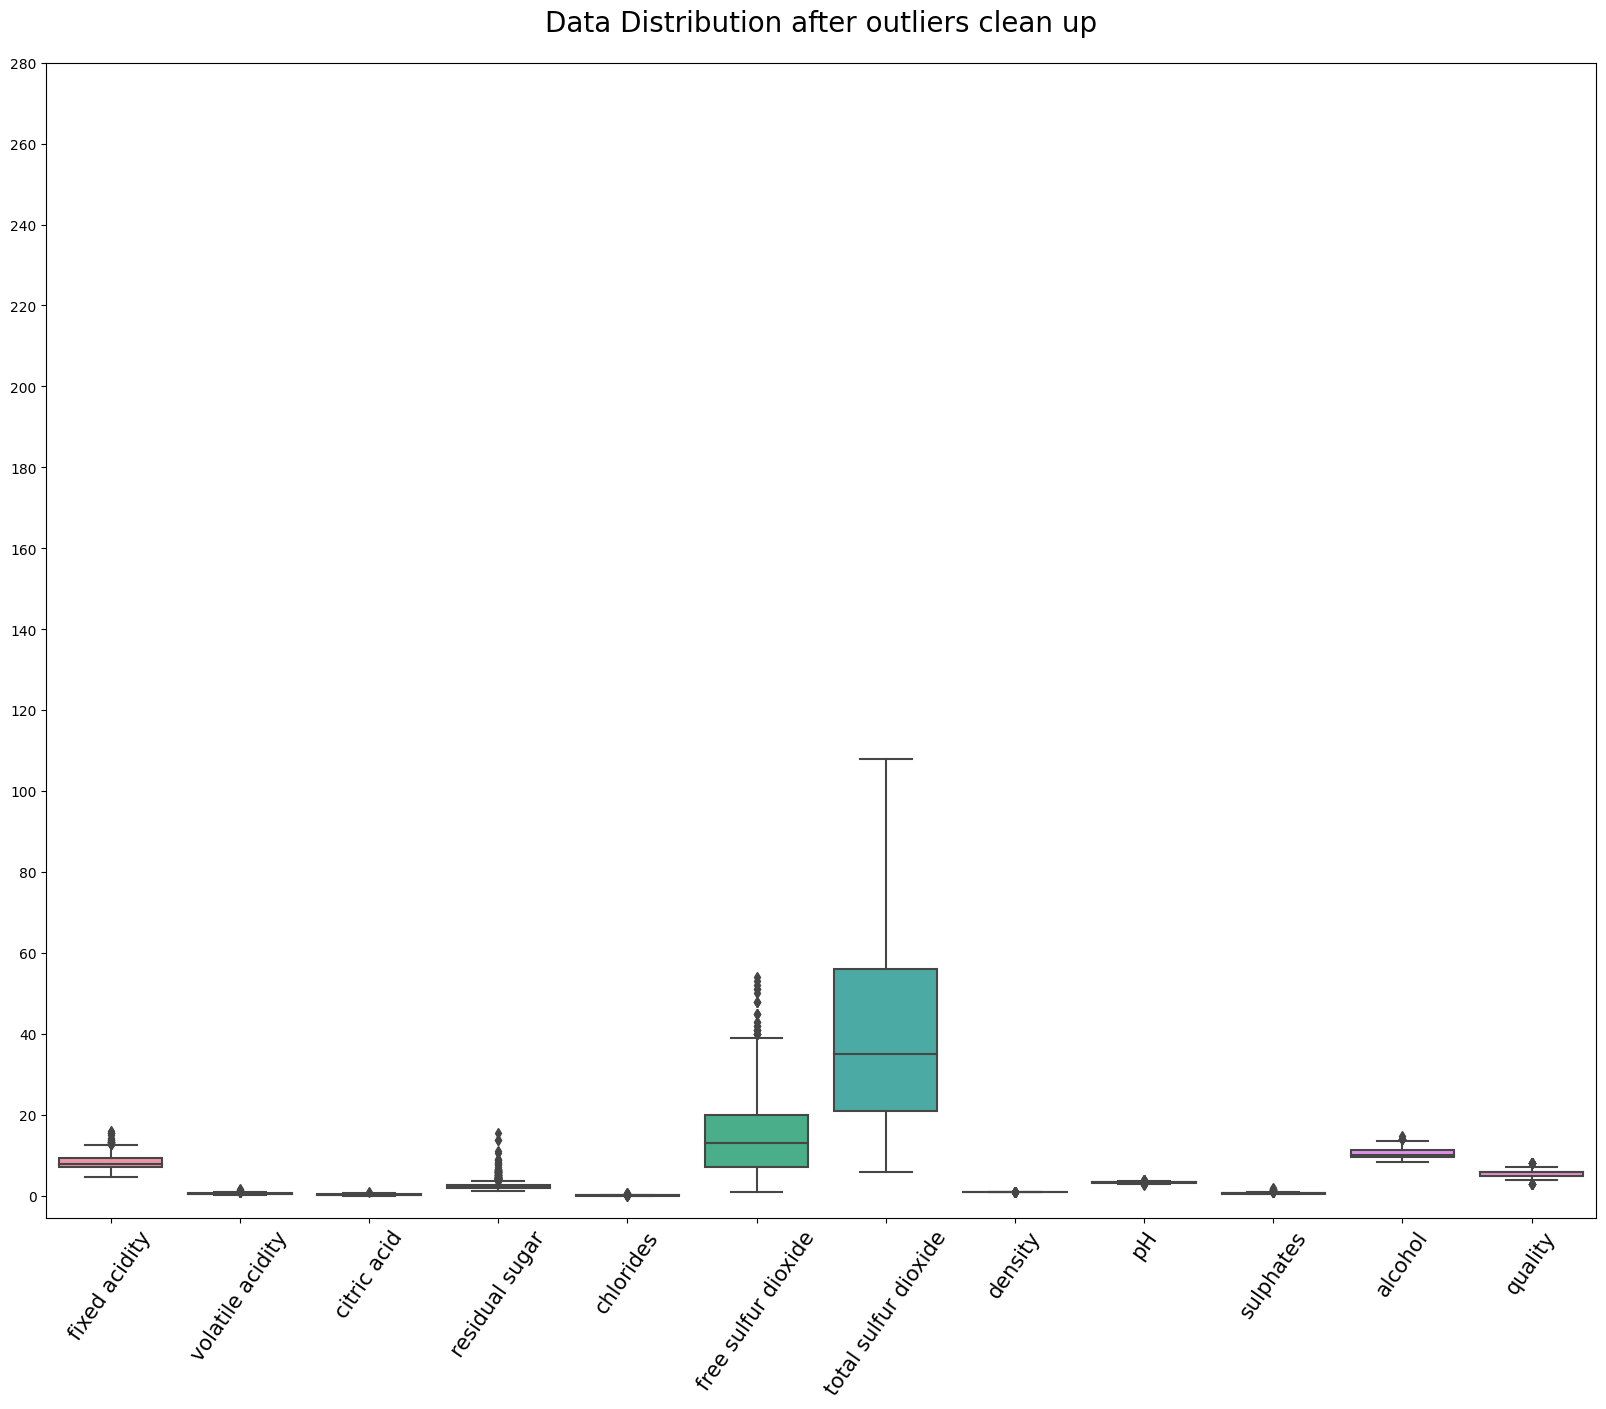

In [15]:
#Visualizing boxplots of data distribution following the removal of outliers
plt.figure(figsize=(20,15))
sns.boxplot(data=w_out)
plt.yticks(range(0,300,20))
plt.xticks(size=15, rotation=55)
plt.title('Data Distribution after outliers clean up', size=20, y=1.02)
plt.show()

In [16]:
#Checking for any missing values
missing = pd.DataFrame(wineor.isnull().sum(), columns=['Total'])
missing['%'] = (missing['Total']/wineor.shape[0])*100
missing.sort_values(by='%', ascending=False)

,Total,%
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0
sulphates,0,0.0


In [17]:
#Dividing dataset into two callable objects, high quality and low quality split at 5.5
high_quality_wine = wineor[wineor['quality'] >= 6]
low_quality_wine = wineor[wineor['quality'] <= 5]

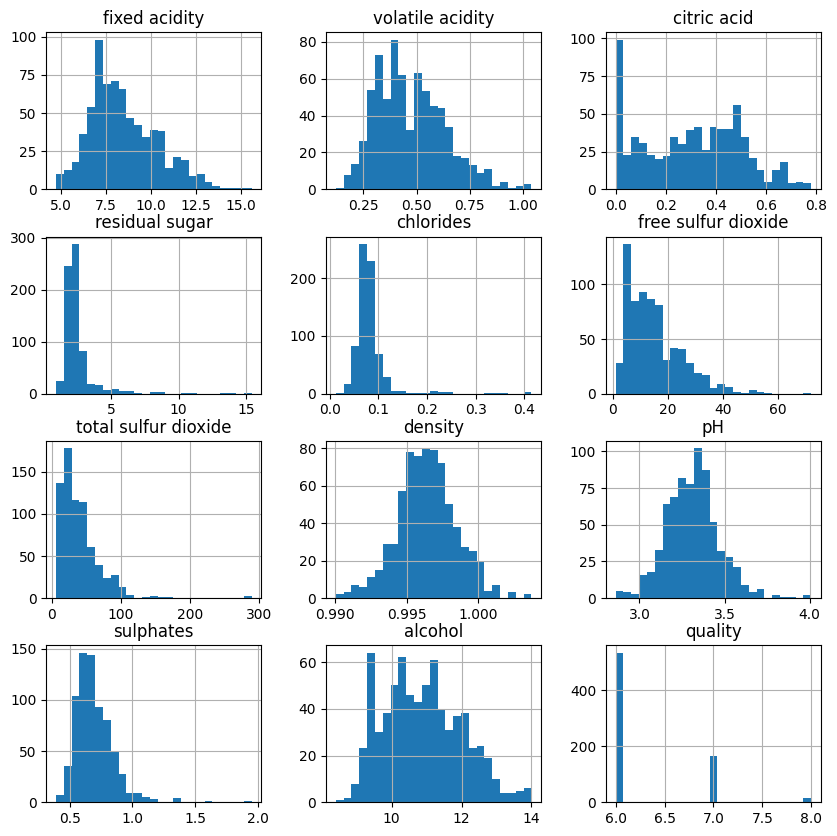

In [18]:
#Visualizing histograms of the data contained within the high quality dataset
high_quality_wine.hist(bins=25,figsize=(10,10))
plt.show()

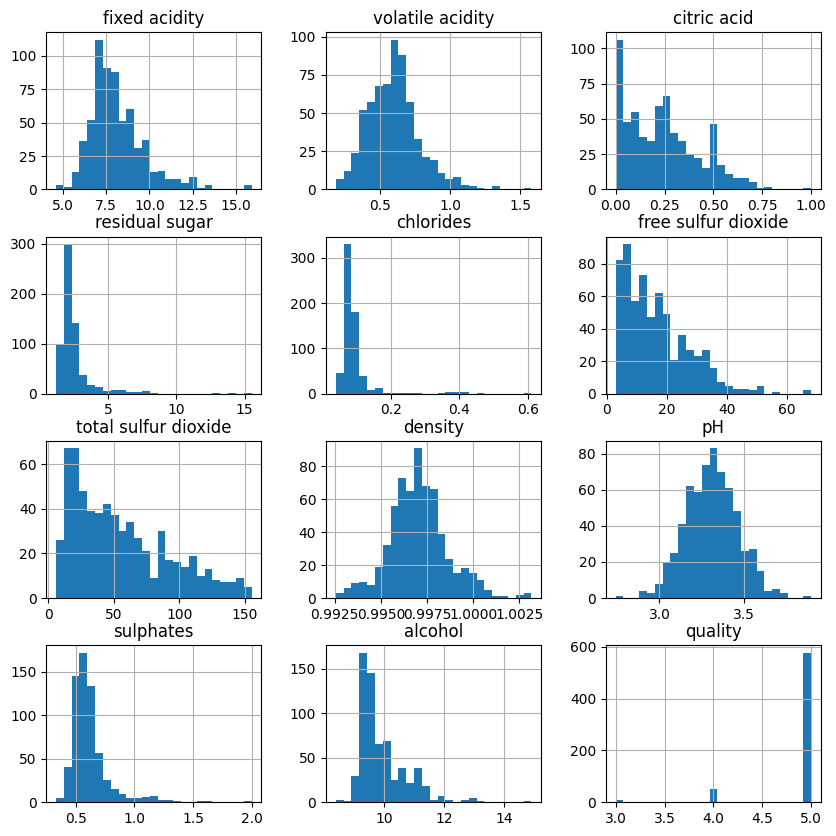

In [19]:
#visualizing histograms of data contained within the low quality dataset
low_quality_wine.hist(bins=25,figsize=(10,10))
plt.show()

In [20]:
#creating multiple copies of the original dataset to work from
wn1 = wineor.copy()
wn2 = wineor.copy()
wn3 = wineor.copy()
wn4 = wineor.copy()
wn5 = wineor.copy()

In [21]:
#creating copies of the dataset, less the outlying data, to work from
w_out1 = w_out.copy()
w_out2 = w_out.copy()

In [22]:
#Creating bins for the quality of the wine to separate it into low quality wine (0) and high quality wine (1) at 5.5
wn1['quality'] = pd.cut(
    wn1['quality'],
    bins=[0, 5.5, 10],
    labels=['0', '1'],
    include_lowest=True
  ).astype('int64')
wn1_groups = wn1.groupby('quality')
wn1_counts = wn1_groups.size()
print(wn1_counts)

quality
0    640
1    719
dtype: int64


In [23]:
#Creating bins for dataset with outliers removed of the quality of the wine to separate it into low quality wine (0) and high quality wine (1) at 5.5
w_out1['quality'] = pd.cut(
    w_out1['quality'],
    bins=[0, 5.5, 10],
    labels=['0', '1'],
    include_lowest=True
  ).astype('int64')
w_out1_groups = w_out1.groupby('quality')
w_out1_counts = w_out1_groups.size()
print(w_out1_counts)

quality
0    561
1    708
dtype: int64


In [24]:
#Creating bins for the quality of the wine to separate it into low quality wine (0) and high quality wine (1) at 6.5
wn2['quality'] = pd.cut(
    wn2['quality'],
    bins=[0, 6.5, 10],
    labels=['0', '1'],
    include_lowest=True
  ).astype('int64')
wn2_groups = wn2.groupby('quality')
wn2_counts = wn2_groups.size()
print(wn2_counts)

quality
0    1175
1     184
dtype: int64


In [25]:
#Creating bins for the quality of the wine to separate it into low quality wine (0) and high quality wine (1) at 6.5 with outlying data removed
w_out2['quality'] = pd.cut(
    w_out2['quality'],
    bins=[0, 6.5, 10],
    labels=['0', '1'],
    include_lowest=True
  ).astype('int64')
w_out2_groups = w_out2.groupby('quality')
w_out2_counts = w_out2_groups.size()
print(w_out2_counts)

quality
0    1087
1     182
dtype: int64


In [26]:
#Separating Data from Data Frame to allow for further classification of high quality wines and low quality wines
high_quality_wine['quality'] = pd.cut(
    high_quality_wine['quality'],
    bins=[5.5, 6.5, 10],
    labels=['0', '1'],
    include_lowest=True
).astype('int64')

low_quality_wine['quality'] = pd.cut(
    low_quality_wine['quality'],
    bins=[0, 4.5, 5.5],
    labels=['0', '1'],
    include_lowest=True
).astype('int64')
hq_groups = high_quality_wine.groupby('quality')
hq_counts = hq_groups.size()
print(hq_counts)
lq_groups = low_quality_wine.groupby('quality')
lq_counts = lq_groups.size()
print(lq_counts)

quality
0    535
1    184
dtype: int64
quality
0     63
1    577
dtype: int64


In [27]:
#Creating bins for the quality of the wine to separate it into low quality wine (0), mid quality wine (1) and high quality wine (2) at 5.5 and 7.5 to allow for multiclass classification of dataset
wn3['quality'] = pd.cut(
    wn3['quality'],
    bins=[0, 5.5, 7.5, 10],
    labels=['0', '1', '2'],
    include_lowest=True
  ).astype('int64')
wn3_groups = wn3.groupby('quality')
wn3_counts = wn3_groups.size()
print(wn3_counts)

quality
0    640
1    702
2     17
dtype: int64


In [28]:
#bins=[0, 5.5, 10]
from pycaret.classification import *
exp_wn1 = setup(data=wn1, target = 'quality')
exp_wn1_1 = setup(data=wn1, normalize = True, normalize_method ='minmax', target = 'quality')
exp_wn1_2 = setup(data=wn1, fix_imbalance = True, target = 'quality')
exp_wn1_3 = setup(data=wn1, fix_imbalance = True, normalize = True, normalize_method = 'minmax', target = 'quality')

,Description,Value
0,Session id,4241
1,Target,quality
2,Target type,Binary
3,Original data shape,"(1359, 12)"
4,Transformed data shape,"(1359, 12)"
5,Transformed train set shape,"(951, 12)"
6,Transformed test set shape,"(408, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,3070
1,Target,quality
2,Target type,Binary
3,Original data shape,"(1359, 12)"
4,Transformed data shape,"(1359, 12)"
5,Transformed train set shape,"(951, 12)"
6,Transformed test set shape,"(408, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,5336
1,Target,quality
2,Target type,Binary
3,Original data shape,"(1359, 12)"
4,Transformed data shape,"(1414, 12)"
5,Transformed train set shape,"(1006, 12)"
6,Transformed test set shape,"(408, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,2948
1,Target,quality
2,Target type,Binary
3,Original data shape,"(1359, 12)"
4,Transformed data shape,"(1414, 12)"
5,Transformed train set shape,"(1006, 12)"
6,Transformed test set shape,"(408, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [29]:
print("Parameters:(data=wn2, target = 'quality')")
testwn1 = exp_wn1.compare_models()

print("\n\nParameters: (data=wn1, normalize = True, normalize_method ='minmax', target = 'quality')")
testwn1_1 = exp_wn1_1.compare_models()

print("\n\nParameters: (data=wn1, fix_imbalance = True, target = 'quality')")
testwn1_2 = exp_wn1_2.compare_models()

print("\n\nParameters: (data=wn1, fix_imbalance = True, normalize = True, normalize_method = 'minmax', target = 'quality')")
testwn1_3 = exp_wn1_3.compare_models()

Parameters:(data=wn2, target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7414,0.8080,0.7435,0.7640,0.7511,0.4818,0.4851,2.9440
et,Extra Trees Classifier,0.7403,0.8094,0.7592,0.7522,0.7533,0.4787,0.4824,0.4530
rf,Random Forest Classifier,0.7382,0.8063,0.7415,0.7597,0.7487,0.4754,0.4780,0.3130
lda,Linear Discriminant Analysis,0.7351,0.8069,0.7258,0.7638,0.7416,0.4702,0.4742,0.0300
ridge,Ridge Classifier,0.7309,0.0000,0.7178,0.7610,0.7363,0.4620,0.4657,0.0290
lr,Logistic Regression,0.7246,0.8061,0.7160,0.7545,0.7318,0.4492,0.4536,0.6860
lightgbm,Light Gradient Boosting Machine,0.7214,0.7863,0.7335,0.7410,0.7354,0.4408,0.4435,0.2480
gbc,Gradient Boosting Classifier,0.7193,0.7998,0.7295,0.7409,0.7317,0.4369,0.4415,0.2300
nb,Naive Bayes,0.7172,0.7827,0.7256,0.7349,0.7288,0.4332,0.4351,0.0600
xgboost,Extreme Gradient Boosting,0.7045,0.7755,0.7095,0.7287,0.7164,0.4076,0.4113,0.1160


Processing:   0%|          | 0/69 [00:00<?, ?it/s]



Parameters: (data=wn1, normalize = True, normalize_method ='minmax', target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7571,0.8386,0.7735,0.7729,0.7710,0.5125,0.5156,0.2450
lr,Logistic Regression,0.7560,0.8261,0.7475,0.7849,0.7639,0.5118,0.5148,0.0460
catboost,CatBoost Classifier,0.7518,0.8375,0.7535,0.7754,0.7626,0.5027,0.5053,2.9590
ridge,Ridge Classifier,0.7486,0.0000,0.7355,0.7792,0.7549,0.4975,0.5005,0.0470
rf,Random Forest Classifier,0.7455,0.8358,0.7416,0.7713,0.7544,0.4906,0.4932,0.5350
gbc,Gradient Boosting Classifier,0.7455,0.8256,0.7516,0.7665,0.7567,0.4901,0.4930,0.2340
lda,Linear Discriminant Analysis,0.7455,0.8270,0.7396,0.7728,0.7543,0.4907,0.4931,0.0390
lightgbm,Light Gradient Boosting Machine,0.7434,0.8247,0.7436,0.7671,0.7535,0.4862,0.4885,0.5960
ada,Ada Boost Classifier,0.7423,0.8133,0.7414,0.7679,0.7526,0.4839,0.4866,0.1570
nb,Naive Bayes,0.7381,0.8104,0.7674,0.7473,0.7562,0.4736,0.4752,0.0390


Processing:   0%|          | 0/69 [00:00<?, ?it/s]



Parameters: (data=wn1, fix_imbalance = True, target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7623,0.8379,0.7535,0.7877,0.7688,0.5246,0.5269,0.2480
lightgbm,Light Gradient Boosting Machine,0.7581,0.8233,0.7416,0.7906,0.7633,0.5166,0.5201,0.5300
gbc,Gradient Boosting Classifier,0.7571,0.8254,0.7435,0.7842,0.7610,0.5146,0.5176,0.2530
catboost,CatBoost Classifier,0.7539,0.8343,0.7335,0.7875,0.7574,0.5085,0.5123,3.4660
xgboost,Extreme Gradient Boosting,0.7497,0.8260,0.7495,0.7722,0.7589,0.4988,0.5012,0.2100
rf,Random Forest Classifier,0.7476,0.8353,0.7257,0.7819,0.7507,0.4961,0.4996,0.5630
ridge,Ridge Classifier,0.7444,0.0000,0.7116,0.7860,0.7441,0.4904,0.4953,0.0390
ada,Ada Boost Classifier,0.7402,0.8040,0.7474,0.7574,0.7507,0.4794,0.4813,0.1600
lda,Linear Discriminant Analysis,0.7402,0.8239,0.7155,0.7771,0.7420,0.4814,0.4857,0.0410
lr,Logistic Regression,0.7371,0.8247,0.7096,0.7763,0.7384,0.4753,0.4800,0.1600


Processing:   0%|          | 0/69 [00:00<?, ?it/s]



Parameters: (data=wn1, fix_imbalance = True, normalize = True, normalize_method = 'minmax', target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7539,0.8212,0.7576,0.7739,0.7651,0.5067,0.5077,0.4680
catboost,CatBoost Classifier,0.7392,0.8180,0.7377,0.7652,0.7496,0.4775,0.4802,3.6560
rf,Random Forest Classifier,0.7371,0.8137,0.7396,0.7598,0.7485,0.4731,0.4748,0.3280
lr,Logistic Regression,0.7360,0.8095,0.7018,0.7811,0.7374,0.4733,0.4780,0.0540
lda,Linear Discriminant Analysis,0.7329,0.8080,0.7019,0.7763,0.7350,0.4668,0.4714,0.0510
ridge,Ridge Classifier,0.7287,0.0000,0.6940,0.7746,0.7300,0.4586,0.4636,0.0690
lightgbm,Light Gradient Boosting Machine,0.7287,0.8044,0.7178,0.7580,0.7363,0.4572,0.4591,0.5090
nb,Naive Bayes,0.7234,0.7735,0.7118,0.7546,0.7300,0.4467,0.4502,0.0730
svm,SVM - Linear Kernel,0.7181,0.0000,0.7474,0.7452,0.7354,0.4324,0.4492,0.0840
xgboost,Extreme Gradient Boosting,0.7150,0.7933,0.7237,0.7355,0.7286,0.4283,0.4296,0.1410


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [30]:
#Testing Models with outlying data removed, Bins [0, 5.5, 10], w_out1
from pycaret.classification import *
ew_out1 = setup(data=w_out1, target = 'quality')
ew_out1_1 = setup(data=w_out1, normalize = True, normalize_method ='minmax', target = 'quality')
ew_out1_2 = setup(data=w_out1, fix_imbalance = True, target = 'quality')
ew_out1_3 = setup(data=w_out1, fix_imbalance = True, normalize = True, normalize_method = 'minmax', target = 'quality')

,Description,Value
0,Session id,6633
1,Target,quality
2,Target type,Binary
3,Original data shape,"(1269, 12)"
4,Transformed data shape,"(1269, 12)"
5,Transformed train set shape,"(888, 12)"
6,Transformed test set shape,"(381, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,1627
1,Target,quality
2,Target type,Binary
3,Original data shape,"(1269, 12)"
4,Transformed data shape,"(1269, 12)"
5,Transformed train set shape,"(888, 12)"
6,Transformed test set shape,"(381, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,2151
1,Target,quality
2,Target type,Binary
3,Original data shape,"(1269, 12)"
4,Transformed data shape,"(1371, 12)"
5,Transformed train set shape,"(990, 12)"
6,Transformed test set shape,"(381, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,4082
1,Target,quality
2,Target type,Binary
3,Original data shape,"(1269, 12)"
4,Transformed data shape,"(1371, 12)"
5,Transformed train set shape,"(990, 12)"
6,Transformed test set shape,"(381, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [31]:
print("\n\nParameters:(data=w_out1, target = 'quality')")
testw_out1 = ew_out1.compare_models()

print("\n\nParameters: (data=w_out1, normalize = True, normalize_method ='minmax', target = 'quality')")
testw_out1_1 = ew_out1_1.compare_models()

print("\n\nParameters: (data=w_out1, fix_imbalance = True, target = 'quality')")
testw_out1_2 = ew_out1_2.compare_models()

print("\n\nParameters: (data=w_out1, fix_imbalance = True, normalize = True, normalize_method = 'minmax', target = 'quality')")
testw_out1_3 = ew_out1_3.compare_models()



Parameters:(data=w_out1, target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7681,0.8297,0.7860,0.7978,0.7909,0.5306,0.5322,2.7660
et,Extra Trees Classifier,0.7535,0.8161,0.7780,0.7841,0.7792,0.5000,0.5028,0.2420
gbc,Gradient Boosting Classifier,0.7456,0.8163,0.7578,0.7832,0.7682,0.4863,0.4898,0.2210
lightgbm,Light Gradient Boosting Machine,0.7433,0.8108,0.7758,0.7715,0.7711,0.4786,0.4830,0.5590
rf,Random Forest Classifier,0.7398,0.8128,0.7556,0.7765,0.7643,0.4740,0.4766,0.4740
lda,Linear Discriminant Analysis,0.7365,0.8174,0.7536,0.7707,0.7610,0.4674,0.4693,0.0330
lr,Logistic Regression,0.7332,0.8123,0.7537,0.7659,0.7587,0.4603,0.4621,0.1260
ridge,Ridge Classifier,0.7298,0.0000,0.7436,0.7674,0.7539,0.4543,0.4567,0.0300
xgboost,Extreme Gradient Boosting,0.7242,0.7992,0.7598,0.7518,0.7543,0.4398,0.4423,0.1040
qda,Quadratic Discriminant Analysis,0.7186,0.7768,0.7981,0.7268,0.7594,0.4220,0.4276,0.0580


Processing:   0%|          | 0/69 [00:00<?, ?it/s]



Parameters: (data=w_out1, normalize = True, normalize_method ='minmax', target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7680,0.8285,0.7736,0.8043,0.7877,0.5318,0.5337,0.3200
et,Extra Trees Classifier,0.7591,0.8224,0.7799,0.7887,0.7833,0.5118,0.5133,0.2460
catboost,CatBoost Classifier,0.7545,0.8270,0.7656,0.7901,0.7766,0.5040,0.5058,2.6980
gbc,Gradient Boosting Classifier,0.7534,0.8217,0.7736,0.7819,0.7773,0.5008,0.5014,0.3110
lightgbm,Light Gradient Boosting Machine,0.7343,0.8002,0.7495,0.7676,0.7580,0.4634,0.4641,0.6580
lr,Logistic Regression,0.7330,0.8117,0.7453,0.7701,0.7570,0.4607,0.4619,0.0440
lda,Linear Discriminant Analysis,0.7308,0.8165,0.7413,0.7695,0.7547,0.4563,0.4573,0.0400
ridge,Ridge Classifier,0.7297,0.0000,0.7393,0.7692,0.7535,0.4541,0.4552,0.0380
xgboost,Extreme Gradient Boosting,0.7287,0.7954,0.7494,0.7613,0.7545,0.4511,0.4524,0.1100
ada,Ada Boost Classifier,0.7275,0.8000,0.7674,0.7499,0.7576,0.4461,0.4478,0.2670


Processing:   0%|          | 0/69 [00:00<?, ?it/s]



Parameters: (data=w_out1, fix_imbalance = True, target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7455,0.8115,0.7436,0.7878,0.7631,0.4887,0.4918,0.2480
rf,Random Forest Classifier,0.7353,0.8089,0.7353,0.7774,0.7538,0.4680,0.4710,0.3220
lda,Linear Discriminant Analysis,0.7297,0.8153,0.6951,0.7949,0.7403,0.4612,0.4670,0.0430
catboost,CatBoost Classifier,0.7297,0.8098,0.7274,0.7733,0.7480,0.4572,0.4598,4.7860
ridge,Ridge Classifier,0.7285,0.0000,0.6971,0.7919,0.7402,0.4584,0.4638,0.0400
nb,Naive Bayes,0.7263,0.7917,0.6948,0.7911,0.7376,0.4540,0.4605,0.0390
lightgbm,Light Gradient Boosting Machine,0.7240,0.7910,0.7396,0.7599,0.7478,0.4429,0.4453,0.2590
lr,Logistic Regression,0.7229,0.8109,0.7012,0.7812,0.7377,0.4457,0.4500,0.2050
gbc,Gradient Boosting Classifier,0.7207,0.8020,0.7151,0.7684,0.7397,0.4389,0.4414,0.5530
ada,Ada Boost Classifier,0.7195,0.7943,0.7132,0.7683,0.7388,0.4367,0.4391,0.1660


Processing:   0%|          | 0/69 [00:00<?, ?it/s]



Parameters: (data=w_out1, fix_imbalance = True, normalize = True, normalize_method = 'minmax', target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7647,0.8204,0.7474,0.8160,0.7793,0.5282,0.5317,0.3630
catboost,CatBoost Classifier,0.7590,0.8258,0.7312,0.8178,0.7709,0.5184,0.5233,3.8450
et,Extra Trees Classifier,0.7489,0.8272,0.7413,0.7949,0.7661,0.4956,0.4985,0.2490
gbc,Gradient Boosting Classifier,0.7466,0.8129,0.7249,0.8013,0.7604,0.4929,0.4965,0.2650
xgboost,Extreme Gradient Boosting,0.7455,0.8169,0.7452,0.7886,0.7654,0.4876,0.4900,0.1450
ridge,Ridge Classifier,0.7376,0.0000,0.7027,0.8024,0.7487,0.4765,0.4817,0.0460
lightgbm,Light Gradient Boosting Machine,0.7376,0.8116,0.7332,0.7818,0.7560,0.4728,0.4748,0.5620
lda,Linear Discriminant Analysis,0.7365,0.8086,0.6968,0.8056,0.7466,0.4748,0.4810,0.0460
lr,Logistic Regression,0.7320,0.8045,0.6968,0.7984,0.7435,0.4654,0.4709,0.1210
ada,Ada Boost Classifier,0.7319,0.7882,0.7371,0.7710,0.7529,0.4600,0.4614,0.2850


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [32]:
#Bins [0, 6.5, 10]
from pycaret.classification import *
exp_wn2 = setup(data=wn2, target = 'quality')
exp_wn2_1 = setup(data=wn2, normalize = True, normalize_method ='minmax', target = 'quality')
exp_wn2_2 = setup(data=wn2, fix_imbalance = True, target = 'quality')
exp_wn2_3 = setup(data=wn2, fix_imbalance = True, normalize = True, normalize_method = 'minmax', target = 'quality')

,Description,Value
0,Session id,515
1,Target,quality
2,Target type,Binary
3,Original data shape,"(1359, 12)"
4,Transformed data shape,"(1359, 12)"
5,Transformed train set shape,"(951, 12)"
6,Transformed test set shape,"(408, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,4191
1,Target,quality
2,Target type,Binary
3,Original data shape,"(1359, 12)"
4,Transformed data shape,"(1359, 12)"
5,Transformed train set shape,"(951, 12)"
6,Transformed test set shape,"(408, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,6631
1,Target,quality
2,Target type,Binary
3,Original data shape,"(1359, 12)"
4,Transformed data shape,"(2052, 12)"
5,Transformed train set shape,"(1644, 12)"
6,Transformed test set shape,"(408, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,5020
1,Target,quality
2,Target type,Binary
3,Original data shape,"(1359, 12)"
4,Transformed data shape,"(2052, 12)"
5,Transformed train set shape,"(1644, 12)"
6,Transformed test set shape,"(408, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [33]:
print("Parameters:(data=wn2, target = 'quality')")
testwn2 = exp_wn2.compare_models()

print("\n\nParameters: (data=wn1, normalize = True, normalize_method ='minmax', target = 'quality')")
testwn2_1 = exp_wn2_1.compare_models()

print("\n\nParameters: (data=wn1, fix_imbalance = True, target = 'quality')")
testwn2_2 = exp_wn2_2.compare_models()

print("\n\nParameters: (data=wn1, fix_imbalance = True, normalize = True, normalize_method = 'minmax', target = 'quality')")
testwn2_3 = exp_wn2_3.compare_models()

Parameters:(data=wn2, target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8832,0.8791,0.3179,0.6371,0.4177,0.3629,0.3916,0.2140
lightgbm,Light Gradient Boosting Machine,0.8812,0.8683,0.3801,0.6059,0.4639,0.4013,0.4167,0.1770
rf,Random Forest Classifier,0.8801,0.8707,0.3333,0.6021,0.4239,0.3647,0.3865,0.3050
gbc,Gradient Boosting Classifier,0.8770,0.8777,0.3795,0.5901,0.4535,0.3884,0.4047,0.2590
catboost,CatBoost Classifier,0.8769,0.8817,0.3724,0.5685,0.4446,0.3803,0.3933,2.9270
ada,Ada Boost Classifier,0.8759,0.8217,0.4179,0.5641,0.4733,0.4057,0.4150,0.2520
xgboost,Extreme Gradient Boosting,0.8748,0.8689,0.4276,0.5522,0.4772,0.4086,0.4150,0.0870
lda,Linear Discriminant Analysis,0.8738,0.8668,0.3801,0.5615,0.4446,0.3781,0.3915,0.0310
lr,Logistic Regression,0.8707,0.8604,0.2173,0.5354,0.2987,0.2482,0.2835,0.1130
dummy,Dummy Classifier,0.8644,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0280


Processing:   0%|          | 0/69 [00:00<?, ?it/s]



Parameters: (data=wn1, normalize = True, normalize_method ='minmax', target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8791,0.8677,0.3192,0.5990,0.4014,0.3453,0.3710,2.9080
et,Extra Trees Classifier,0.8738,0.8641,0.2263,0.5814,0.3198,0.2675,0.3048,0.3150
knn,K Neighbors Classifier,0.8717,0.7861,0.4032,0.5781,0.4657,0.3957,0.4092,0.0600
gbc,Gradient Boosting Classifier,0.8717,0.8569,0.3269,0.5154,0.3951,0.3309,0.3424,0.2290
lda,Linear Discriminant Analysis,0.8706,0.8631,0.3423,0.5738,0.4052,0.3405,0.3640,0.0390
ada,Ada Boost Classifier,0.8696,0.8186,0.3737,0.5093,0.4273,0.3574,0.3642,0.1550
rf,Random Forest Classifier,0.8675,0.8566,0.2500,0.5463,0.3294,0.2696,0.2991,0.3080
lightgbm,Light Gradient Boosting Machine,0.8675,0.8507,0.3583,0.5449,0.4086,0.3411,0.3614,0.2400
dummy,Dummy Classifier,0.8644,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0330
lr,Logistic Regression,0.8633,0.8594,0.0788,0.4000,0.1275,0.0976,0.1392,0.0430


Processing:   0%|          | 0/69 [00:00<?, ?it/s]



Parameters: (data=wn1, fix_imbalance = True, target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.8644,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0350
et,Extra Trees Classifier,0.8486,0.8678,0.5372,0.4438,0.4722,0.3867,0.3976,0.4580
lightgbm,Light Gradient Boosting Machine,0.8465,0.8612,0.5603,0.4426,0.4879,0.3997,0.4080,0.5360
xgboost,Extreme Gradient Boosting,0.8402,0.8595,0.5295,0.4324,0.4668,0.3753,0.3837,0.1600
catboost,CatBoost Classifier,0.8391,0.8729,0.5910,0.4398,0.4926,0.4013,0.4150,5.4280
rf,Random Forest Classifier,0.8381,0.8646,0.5359,0.4282,0.4661,0.3738,0.3831,0.6630
gbc,Gradient Boosting Classifier,0.8266,0.8610,0.6000,0.4122,0.4743,0.3767,0.3963,0.4230
ada,Ada Boost Classifier,0.8255,0.8545,0.6603,0.4138,0.5023,0.4041,0.4253,0.1950
dt,Decision Tree Classifier,0.8139,0.7004,0.5442,0.3674,0.4339,0.3277,0.3405,0.0500
lr,Logistic Regression,0.7876,0.8537,0.8077,0.3744,0.5083,0.3965,0.4467,0.1790


Processing:   0%|          | 0/69 [00:00<?, ?it/s]



Parameters: (data=wn1, fix_imbalance = True, normalize = True, normalize_method = 'minmax', target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.8644,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0690
et,Extra Trees Classifier,0.8602,0.8850,0.5974,0.5028,0.5414,0.4608,0.4657,0.2630
lightgbm,Light Gradient Boosting Machine,0.8485,0.8738,0.5282,0.4628,0.4870,0.3999,0.4047,0.7990
xgboost,Extreme Gradient Boosting,0.8464,0.8721,0.5436,0.4536,0.4893,0.4010,0.4062,0.1740
catboost,CatBoost Classifier,0.8412,0.8815,0.6128,0.4513,0.5147,0.4241,0.4339,5.3090
rf,Random Forest Classifier,0.8349,0.8711,0.5667,0.4275,0.4834,0.3886,0.3962,0.4560
gbc,Gradient Boosting Classifier,0.8265,0.8684,0.6051,0.4140,0.4876,0.3889,0.4013,0.4250
dt,Decision Tree Classifier,0.8171,0.7177,0.5814,0.3894,0.4623,0.3585,0.3715,0.0560
ada,Ada Boost Classifier,0.8149,0.8491,0.6282,0.3951,0.4830,0.3787,0.3945,0.3210
lr,Logistic Regression,0.7960,0.8787,0.7833,0.3881,0.5143,0.4063,0.4488,0.0560


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [34]:
#Testing Exp2 Parameters with outliers removed Bins [0, 6.5, 10] w_out2
from pycaret.classification import *
exp_w_out2 = setup(data=w_out2, target = 'quality')
exp_w_out2_1 = setup(data=w_out2, normalize = True, normalize_method ='minmax', target = 'quality')
exp_w_out2_2 = setup(data=w_out2, fix_imbalance = True, target = 'quality')
exp_w_out2_3 = setup(data=w_out2, fix_imbalance = True, normalize = True, normalize_method = 'minmax', target = 'quality')

print("\n\nParameters:(data=w_out2, target = 'quality')")
testw_out2 = exp_w_out2.compare_models()

print("\n\nParameters: (data=wn1, normalize = True, normalize_method ='minmax', target = 'quality')")
testw_out2_1 = exp_w_out2_1.compare_models()

print("\n\nParameters: (data=wn1, fix_imbalance = True, target = 'quality')")
testw_out2_2 = exp_w_out2_2.compare_models()

print("\n\nParameters: (data=wn1, fix_imbalance = True, normalize = True, normalize_method = 'minmax', target = 'quality')")
testw_out2_3 = exp_w_out2_3.compare_models()

,Description,Value
0,Session id,4783
1,Target,quality
2,Target type,Binary
3,Original data shape,"(1269, 12)"
4,Transformed data shape,"(1269, 12)"
5,Transformed train set shape,"(888, 12)"
6,Transformed test set shape,"(381, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,8479
1,Target,quality
2,Target type,Binary
3,Original data shape,"(1269, 12)"
4,Transformed data shape,"(1269, 12)"
5,Transformed train set shape,"(888, 12)"
6,Transformed test set shape,"(381, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,5721
1,Target,quality
2,Target type,Binary
3,Original data shape,"(1269, 12)"
4,Transformed data shape,"(1903, 12)"
5,Transformed train set shape,"(1522, 12)"
6,Transformed test set shape,"(381, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,5673
1,Target,quality
2,Target type,Binary
3,Original data shape,"(1269, 12)"
4,Transformed data shape,"(1903, 12)"
5,Transformed train set shape,"(1522, 12)"
6,Transformed test set shape,"(381, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple




Parameters:(data=w_out2, target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8739,0.8742,0.2917,0.6245,0.3826,0.3261,0.3612,0.2120
gbc,Gradient Boosting Classifier,0.8694,0.8598,0.3635,0.5834,0.4350,0.3676,0.3867,0.2170
xgboost,Extreme Gradient Boosting,0.8693,0.8453,0.4013,0.5705,0.4633,0.3928,0.4046,0.0840
lda,Linear Discriminant Analysis,0.8683,0.8703,0.3712,0.5920,0.4274,0.3612,0.3822,0.0350
lr,Logistic Regression,0.8671,0.8685,0.2455,0.5296,0.3206,0.2677,0.2966,0.1040
rf,Random Forest Classifier,0.8660,0.8631,0.3231,0.5688,0.3969,0.3308,0.3542,0.3290
catboost,CatBoost Classifier,0.8660,0.8745,0.3301,0.5468,0.4004,0.3334,0.3514,2.8110
ridge,Ridge Classifier,0.8638,0.0000,0.1276,0.5683,0.2029,0.1657,0.2224,0.0300
lightgbm,Light Gradient Boosting Machine,0.8592,0.8529,0.3538,0.5209,0.4102,0.3355,0.3489,0.2070
dummy,Dummy Classifier,0.8570,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0290


Processing:   0%|          | 0/69 [00:00<?, ?it/s]



Parameters: (data=wn1, normalize = True, normalize_method ='minmax', target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8694,0.8764,0.2756,0.6079,0.3744,0.3132,0.3462,0.2550
rf,Random Forest Classifier,0.8683,0.8527,0.2833,0.6180,0.3800,0.3173,0.3520,0.3410
catboost,CatBoost Classifier,0.8671,0.8632,0.3378,0.5595,0.4172,0.3481,0.3641,2.8270
gbc,Gradient Boosting Classifier,0.8649,0.8447,0.3231,0.5538,0.4014,0.3325,0.3507,0.2180
lr,Logistic Regression,0.8648,0.8606,0.1410,0.6583,0.2295,0.1867,0.2570,0.0450
ridge,Ridge Classifier,0.8615,0.0000,0.0936,0.5083,0.1546,0.1232,0.1762,0.0630
lda,Linear Discriminant Analysis,0.8615,0.8599,0.3474,0.5366,0.4113,0.3385,0.3535,0.0380
lightgbm,Light Gradient Boosting Machine,0.8604,0.8487,0.3628,0.5182,0.4200,0.3447,0.3548,0.4950
dummy,Dummy Classifier,0.8570,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0330
knn,K Neighbors Classifier,0.8559,0.8212,0.3615,0.5260,0.4120,0.3352,0.3502,0.0550


Processing:   0%|          | 0/69 [00:00<?, ?it/s]



Parameters: (data=wn1, fix_imbalance = True, target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.8570,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0610
et,Extra Trees Classifier,0.8547,0.8665,0.5449,0.5018,0.5150,0.4308,0.4358,0.3210
rf,Random Forest Classifier,0.8356,0.8451,0.5436,0.4506,0.4819,0.3874,0.3961,0.6260
lightgbm,Light Gradient Boosting Machine,0.8311,0.8436,0.5282,0.4332,0.4682,0.3707,0.3778,0.4220
catboost,CatBoost Classifier,0.8288,0.8515,0.5744,0.4356,0.4855,0.3872,0.3986,5.1760
xgboost,Extreme Gradient Boosting,0.8277,0.8448,0.5436,0.4254,0.4692,0.3699,0.3788,0.2360
gbc,Gradient Boosting Classifier,0.8096,0.8452,0.5897,0.3945,0.4686,0.3595,0.3728,0.3980
dt,Decision Tree Classifier,0.8086,0.6864,0.5147,0.3821,0.4332,0.3228,0.3309,0.0460
ada,Ada Boost Classifier,0.8029,0.8486,0.6782,0.3960,0.4963,0.3855,0.4095,0.1890
lr,Logistic Regression,0.7781,0.8576,0.7712,0.3719,0.5001,0.3805,0.4228,0.1600


Processing:   0%|          | 0/69 [00:00<?, ?it/s]



Parameters: (data=wn1, fix_imbalance = True, normalize = True, normalize_method = 'minmax', target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.8570,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0440
et,Extra Trees Classifier,0.8524,0.8723,0.5436,0.4896,0.5082,0.4230,0.4280,0.2630
xgboost,Extreme Gradient Boosting,0.8468,0.8636,0.5365,0.4613,0.4901,0.4013,0.4067,0.1450
lightgbm,Light Gradient Boosting Machine,0.8389,0.8620,0.5519,0.4527,0.4936,0.3996,0.4048,0.7230
rf,Random Forest Classifier,0.8333,0.8600,0.5513,0.4322,0.4768,0.3804,0.3899,0.4110
gbc,Gradient Boosting Classifier,0.8287,0.8597,0.6237,0.4394,0.5107,0.4121,0.4245,0.6350
catboost,CatBoost Classifier,0.8277,0.8602,0.5532,0.4222,0.4737,0.3737,0.3822,5.1770
ada,Ada Boost Classifier,0.8164,0.8379,0.6628,0.4124,0.5055,0.4006,0.4200,0.1980
lr,Logistic Regression,0.7871,0.8682,0.7942,0.3865,0.5175,0.4025,0.4471,0.0900
svm,SVM - Linear Kernel,0.7871,0.0000,0.7878,0.3902,0.5180,0.4037,0.4465,0.0460


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [35]:
#Experimenting with 3 Bin setup Bins [0, 5.5, 7.5, 10]
from pycaret.classification import *
exp_wn3 = setup(data=wn3, target = 'quality')
exp_wn3_1 = setup(data=wn3, normalize = True, normalize_method ='minmax', target = 'quality')
exp_wn3_2 = setup(data=wn3, fix_imbalance = True, target = 'quality')
exp_wn3_3 = setup(data=wn3, fix_imbalance = True, normalize = True, normalize_method = 'minmax', target = 'quality')

,Description,Value
0,Session id,7591
1,Target,quality
2,Target type,Multiclass
3,Original data shape,"(1359, 12)"
4,Transformed data shape,"(1359, 12)"
5,Transformed train set shape,"(951, 12)"
6,Transformed test set shape,"(408, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,4442
1,Target,quality
2,Target type,Multiclass
3,Original data shape,"(1359, 12)"
4,Transformed data shape,"(1359, 12)"
5,Transformed train set shape,"(951, 12)"
6,Transformed test set shape,"(408, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,4600
1,Target,quality
2,Target type,Multiclass
3,Original data shape,"(1359, 12)"
4,Transformed data shape,"(1881, 12)"
5,Transformed train set shape,"(1473, 12)"
6,Transformed test set shape,"(408, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,7265
1,Target,quality
2,Target type,Multiclass
3,Original data shape,"(1359, 12)"
4,Transformed data shape,"(1881, 12)"
5,Transformed train set shape,"(1473, 12)"
6,Transformed test set shape,"(408, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [36]:
#include function used to reduce testing time, eliminating testing unsuitable models
print("Parameters:(data=wn2, target = 'quality')")
testwn3 = exp_wn3.compare_models(include = ['dt', 'rf', 'et','lightgbm', 'xgboost', 'catboost'])

print("\n\nParameters: (data=wn1, normalize = True, normalize_method ='minmax', target = 'quality')")
testwn3_1 = exp_wn3_1.compare_models(include = ['dt', 'rf', 'et','lightgbm', 'xgboost', 'catboost'])

print("\n\nParameters: (data=wn1, fix_imbalance = True, target = 'quality')")
testwn3_2 = exp_wn3_2.compare_models(include = ['dt', 'rf', 'et','lightgbm', 'xgboost', 'catboost'])

print("\n\nParameters: (data=wn1, fix_imbalance = True, normalize = True, normalize_method = 'minmax', target = 'quality')")
testwn3_3 = exp_wn3_3.compare_models(include = ['dt', 'rf', 'et','lightgbm', 'xgboost', 'catboost'])

Parameters:(data=wn2, target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7476,0.8174,0.7476,0.7419,0.7437,0.5019,0.5033,0.2410
rf,Random Forest Classifier,0.7318,0.8169,0.7318,0.7252,0.7270,0.4698,0.4718,0.3240
xgboost,Extreme Gradient Boosting,0.7318,0.8109,0.7318,0.7272,0.7282,0.4705,0.4723,0.1900
lightgbm,Light Gradient Boosting Machine,0.7308,0.8108,0.7308,0.7255,0.7261,0.4675,0.4701,0.8360
catboost,CatBoost Classifier,0.7297,0.8162,0.7297,0.7234,0.7254,0.4662,0.4678,4.8550
dt,Decision Tree Classifier,0.6540,0.6646,0.6540,0.6593,0.6544,0.3262,0.3282,0.0620


Processing:   0%|          | 0/29 [00:00<?, ?it/s]



Parameters: (data=wn1, normalize = True, normalize_method ='minmax', target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7487,0.8266,0.7487,0.7420,0.7441,0.5034,0.5053,0.4440
rf,Random Forest Classifier,0.7477,0.8223,0.7477,0.7398,0.7426,0.5008,0.5025,0.3190
catboost,CatBoost Classifier,0.7477,0.8132,0.7477,0.7397,0.7425,0.4999,0.5016,4.9900
lightgbm,Light Gradient Boosting Machine,0.7350,0.8143,0.7350,0.7285,0.7302,0.4754,0.4776,0.6740
xgboost,Extreme Gradient Boosting,0.7319,0.8036,0.7319,0.7257,0.7277,0.4707,0.4721,0.2000
dt,Decision Tree Classifier,0.6699,0.6792,0.6699,0.6727,0.6693,0.3555,0.3574,0.0450


Processing:   0%|          | 0/29 [00:00<?, ?it/s]



Parameters: (data=wn1, fix_imbalance = True, target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7256,0.7974,0.7256,0.7306,0.7262,0.4675,0.4694,0.4080
et,Extra Trees Classifier,0.7098,0.7879,0.7098,0.7137,0.7106,0.4354,0.4368,0.2780
lightgbm,Light Gradient Boosting Machine,0.7036,0.7722,0.7036,0.7088,0.7045,0.4245,0.4263,1.1920
xgboost,Extreme Gradient Boosting,0.6983,0.7644,0.6983,0.7037,0.6994,0.4141,0.4158,0.3110
catboost,CatBoost Classifier,0.6951,0.7803,0.6951,0.7046,0.6983,0.4122,0.4138,9.9380
dt,Decision Tree Classifier,0.6320,0.6492,0.6320,0.6429,0.6347,0.2938,0.2955,0.0760


Processing:   0%|          | 0/29 [00:00<?, ?it/s]



Parameters: (data=wn1, fix_imbalance = True, normalize = True, normalize_method = 'minmax', target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7445,0.8069,0.7445,0.7438,0.7423,0.4991,0.5016,0.2860
rf,Random Forest Classifier,0.7403,0.8093,0.7403,0.7453,0.7394,0.4967,0.4998,0.4150
catboost,CatBoost Classifier,0.7213,0.7908,0.7213,0.7254,0.7212,0.4604,0.4620,9.6980
lightgbm,Light Gradient Boosting Machine,0.7108,0.7765,0.7108,0.7125,0.7100,0.4390,0.4403,1.2510
xgboost,Extreme Gradient Boosting,0.7034,0.7704,0.7034,0.7050,0.7023,0.4223,0.4242,0.5030
dt,Decision Tree Classifier,0.6004,0.6206,0.6004,0.6135,0.6057,0.2363,0.2371,0.0620


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

In [37]:
#Testing models for differentiating wines at high quality
from pycaret.classification import *
hq = setup(data=high_quality_wine, target = 'quality')
hq2 = setup(data=high_quality_wine, normalize = True, normalize_method ='minmax', target = 'quality')
hq3 = setup(data=high_quality_wine, fix_imbalance = True, target = 'quality')
hq4 = setup(data=high_quality_wine, fix_imbalance = True, normalize = True, normalize_method = 'minmax', target = 'quality')

,Description,Value
0,Session id,6534
1,Target,quality
2,Target type,Binary
3,Original data shape,"(719, 12)"
4,Transformed data shape,"(719, 12)"
5,Transformed train set shape,"(503, 12)"
6,Transformed test set shape,"(216, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,8397
1,Target,quality
2,Target type,Binary
3,Original data shape,"(719, 12)"
4,Transformed data shape,"(719, 12)"
5,Transformed train set shape,"(503, 12)"
6,Transformed test set shape,"(216, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,529
1,Target,quality
2,Target type,Binary
3,Original data shape,"(719, 12)"
4,Transformed data shape,"(964, 12)"
5,Transformed train set shape,"(748, 12)"
6,Transformed test set shape,"(216, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,2998
1,Target,quality
2,Target type,Binary
3,Original data shape,"(719, 12)"
4,Transformed data shape,"(964, 12)"
5,Transformed train set shape,"(748, 12)"
6,Transformed test set shape,"(216, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [38]:
print("Parameters:(data=wn2, target = 'quality')")
testhq = hq.compare_models()

print("\n\nParameters: (data=wn1, normalize = True, normalize_method ='minmax', target = 'quality')")
testhq2 = hq2.compare_models()

print("\n\nParameters: (data=wn1, fix_imbalance = True, target = 'quality')")
testhq3 = hq3.compare_models()

print("\n\nParameters: (data=wn1, fix_imbalance = True, normalize = True, normalize_method = 'minmax', target = 'quality')")
testhq4 = hq4.compare_models()

Parameters:(data=wn2, target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7811,0.7556,0.3269,0.6472,0.4206,0.3101,0.3413,0.2080
rf,Random Forest Classifier,0.7713,0.7477,0.3500,0.6082,0.4327,0.3055,0.3288,0.3090
catboost,CatBoost Classifier,0.7713,0.7479,0.3192,0.6110,0.4083,0.2879,0.3151,2.4020
lda,Linear Discriminant Analysis,0.7672,0.7657,0.3410,0.5794,0.4181,0.2894,0.3087,0.0300
lr,Logistic Regression,0.7653,0.7532,0.2705,0.6112,0.3652,0.2482,0.2834,0.0980
ridge,Ridge Classifier,0.7595,0.0000,0.2250,0.6212,0.3220,0.2114,0.2567,0.0590
xgboost,Extreme Gradient Boosting,0.7571,0.7354,0.4186,0.5282,0.4575,0.3086,0.3150,0.0970
nb,Naive Bayes,0.7533,0.7206,0.5353,0.5344,0.5263,0.3622,0.3672,0.0450
gbc,Gradient Boosting Classifier,0.7473,0.7385,0.3724,0.5045,0.4203,0.2677,0.2757,0.1690
dummy,Dummy Classifier,0.7435,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0370


Processing:   0%|          | 0/69 [00:00<?, ?it/s]



Parameters: (data=wn1, normalize = True, normalize_method ='minmax', target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7775,0.7756,0.3660,0.6547,0.4469,0.3250,0.3518,2.5350
et,Extra Trees Classifier,0.7675,0.7685,0.2962,0.6508,0.3843,0.2673,0.3066,0.3920
rf,Random Forest Classifier,0.7595,0.7601,0.3038,0.5527,0.3816,0.2540,0.2731,0.2570
lightgbm,Light Gradient Boosting Machine,0.7537,0.7583,0.3801,0.5465,0.4377,0.2889,0.3021,0.1270
ridge,Ridge Classifier,0.7536,0.0000,0.2179,0.5894,0.2987,0.1897,0.2289,0.0380
lr,Logistic Regression,0.7496,0.7722,0.1795,0.5321,0.2602,0.1581,0.1918,0.0680
gbc,Gradient Boosting Classifier,0.7496,0.7613,0.3647,0.5307,0.4219,0.2720,0.2842,0.1720
lda,Linear Discriminant Analysis,0.7495,0.7722,0.3346,0.5128,0.3963,0.2524,0.2638,0.0380
xgboost,Extreme Gradient Boosting,0.7456,0.7597,0.3641,0.5193,0.4204,0.2653,0.2761,0.1190
ada,Ada Boost Classifier,0.7436,0.7665,0.3968,0.5202,0.4420,0.2814,0.2899,0.1380


Processing:   0%|          | 0/69 [00:00<?, ?it/s]



Parameters: (data=wn1, fix_imbalance = True, target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7573,0.7833,0.5590,0.5346,0.5365,0.3749,0.3816,0.2980
rf,Random Forest Classifier,0.7513,0.7795,0.5513,0.5226,0.5276,0.3610,0.3677,0.2980
xgboost,Extreme Gradient Boosting,0.7435,0.7614,0.5359,0.5026,0.5080,0.3384,0.3446,0.1140
dummy,Dummy Classifier,0.7435,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0380
et,Extra Trees Classifier,0.7394,0.7788,0.4583,0.4832,0.4616,0.2938,0.2977,0.2180
gbc,Gradient Boosting Classifier,0.7374,0.7625,0.5968,0.5015,0.5334,0.3558,0.3668,0.2680
catboost,CatBoost Classifier,0.7314,0.7796,0.5660,0.4785,0.5124,0.3303,0.3371,5.0630
lda,Linear Discriminant Analysis,0.7233,0.7960,0.7442,0.4748,0.5775,0.3864,0.4113,0.0390
ada,Ada Boost Classifier,0.7176,0.7542,0.6038,0.4587,0.5171,0.3230,0.3343,0.2680
lr,Logistic Regression,0.7175,0.7908,0.7212,0.4692,0.5645,0.3701,0.3932,0.1280


Processing:   0%|          | 0/69 [00:00<?, ?it/s]



Parameters: (data=wn1, fix_imbalance = True, normalize = True, normalize_method = 'minmax', target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7515,0.7676,0.4949,0.5201,0.4992,0.3363,0.3407,0.2310
rf,Random Forest Classifier,0.7494,0.7691,0.5494,0.5094,0.5214,0.3537,0.3589,0.3010
dummy,Dummy Classifier,0.7435,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0450
ada,Ada Boost Classifier,0.7433,0.7804,0.6737,0.5113,0.5742,0.3982,0.4121,0.2810
lightgbm,Light Gradient Boosting Machine,0.7395,0.7506,0.5269,0.4945,0.5064,0.3307,0.3335,0.5610
xgboost,Extreme Gradient Boosting,0.7275,0.7275,0.5026,0.4721,0.4807,0.2981,0.3017,0.1230
catboost,CatBoost Classifier,0.7215,0.7583,0.5103,0.4602,0.4764,0.2901,0.2948,5.3100
ridge,Ridge Classifier,0.7214,0.0000,0.7346,0.4800,0.5733,0.3828,0.4090,0.0430
lda,Linear Discriminant Analysis,0.7174,0.7875,0.7192,0.4760,0.5650,0.3717,0.3971,0.0480
lr,Logistic Regression,0.7096,0.7884,0.7423,0.4607,0.5646,0.3655,0.3936,0.0540


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [39]:
#Testing models for differentiating wines at low quality
from pycaret.classification import *
lq = setup(data=low_quality_wine, target = 'quality')
lq2 = setup(data=low_quality_wine, normalize = True, normalize_method ='minmax', target = 'quality')
lq3 = setup(data=low_quality_wine, fix_imbalance = True, target = 'quality')
lq4 = setup(data=low_quality_wine, fix_imbalance = True, normalize = True, normalize_method = 'minmax', target = 'quality')

,Description,Value
0,Session id,5737
1,Target,quality
2,Target type,Binary
3,Original data shape,"(640, 12)"
4,Transformed data shape,"(640, 12)"
5,Transformed train set shape,"(448, 12)"
6,Transformed test set shape,"(192, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,2570
1,Target,quality
2,Target type,Binary
3,Original data shape,"(640, 12)"
4,Transformed data shape,"(640, 12)"
5,Transformed train set shape,"(448, 12)"
6,Transformed test set shape,"(192, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,4752
1,Target,quality
2,Target type,Binary
3,Original data shape,"(640, 12)"
4,Transformed data shape,"(1000, 12)"
5,Transformed train set shape,"(808, 12)"
6,Transformed test set shape,"(192, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,4319
1,Target,quality
2,Target type,Binary
3,Original data shape,"(640, 12)"
4,Transformed data shape,"(1000, 12)"
5,Transformed train set shape,"(808, 12)"
6,Transformed test set shape,"(192, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [40]:
print("Parameters:(data=lq, target = 'quality')")
testlq = lq.compare_models()

print("\n\nParameters: (data=lq, normalize = True, normalize_method ='minmax', target = 'quality')")
testlq2 = lq2.compare_models()

print("\n\nParameters: (data=lq, fix_imbalance = True, target = 'quality')")
testlq3 = lq3.compare_models()

print("\n\nParameters: (data=lq, fix_imbalance = True, normalize = True, normalize_method = 'minmax', target = 'quality')")
testlq4 = lq4.compare_models()

Parameters:(data=wn2, target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9040,0.7803,0.9975,0.9058,0.9493,0.0668,0.0793,2.3880
ridge,Ridge Classifier,0.9018,0.0000,1.0000,0.9018,0.9483,0.0000,0.0000,0.0290
et,Extra Trees Classifier,0.9018,0.7866,0.9926,0.9075,0.9479,0.0824,0.0966,0.2970
dummy,Dummy Classifier,0.9018,0.5000,1.0000,0.9018,0.9483,0.0000,0.0000,0.0450
rf,Random Forest Classifier,0.8996,0.7824,0.9926,0.9054,0.9469,0.0593,0.0693,0.2450
xgboost,Extreme Gradient Boosting,0.8996,0.7190,0.9827,0.9129,0.9463,0.1577,0.1746,0.1350
lr,Logistic Regression,0.8951,0.7152,0.9925,0.9011,0.9446,-0.0114,-0.0150,0.1130
knn,K Neighbors Classifier,0.8928,0.6177,0.9751,0.9126,0.9425,0.1361,0.1444,0.0740
gbc,Gradient Boosting Classifier,0.8906,0.7241,0.9727,0.9120,0.9412,0.1490,0.1690,0.1630
lightgbm,Light Gradient Boosting Machine,0.8906,0.7573,0.9752,0.9102,0.9412,0.1109,0.1293,0.2410


Processing:   0%|          | 0/69 [00:00<?, ?it/s]



Parameters: (data=wn1, normalize = True, normalize_method ='minmax', target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9129,0.7990,0.9975,0.9140,0.9538,0.1979,0.2460,0.2230
svm,SVM - Linear Kernel,0.9063,0.0000,0.9976,0.9079,0.9505,0.0987,0.1126,0.0380
lr,Logistic Regression,0.9040,0.7339,1.0000,0.9039,0.9495,0.0378,0.0483,0.0450
ridge,Ridge Classifier,0.9040,0.0000,1.0000,0.9039,0.9495,0.0378,0.0483,0.0370
knn,K Neighbors Classifier,0.9018,0.6252,0.9950,0.9055,0.9481,0.0679,0.0859,0.0540
dummy,Dummy Classifier,0.9018,0.5000,1.0000,0.9018,0.9483,0.0000,0.0000,0.0340
rf,Random Forest Classifier,0.8973,0.7811,0.9851,0.9089,0.9453,0.0913,0.1009,0.2420
lda,Linear Discriminant Analysis,0.8929,0.7592,0.9752,0.9121,0.9424,0.1488,0.1771,0.0600
catboost,CatBoost Classifier,0.8907,0.7613,0.9827,0.9043,0.9418,0.0397,0.0501,2.6960
qda,Quadratic Discriminant Analysis,0.8860,0.7141,0.9457,0.9297,0.9372,0.3055,0.3282,0.0360


Processing:   0%|          | 0/69 [00:00<?, ?it/s]



Parameters: (data=wn1, fix_imbalance = True, target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8952,0.7743,0.9480,0.9369,0.9421,0.3713,0.3871,0.4200
catboost,CatBoost Classifier,0.8771,0.7632,0.9307,0.9333,0.9312,0.3266,0.3458,5.0210
et,Extra Trees Classifier,0.8750,0.7947,0.9307,0.9314,0.9303,0.2813,0.2983,0.2310
rf,Random Forest Classifier,0.8727,0.7940,0.9307,0.9283,0.9292,0.2765,0.2820,0.4950
xgboost,Extreme Gradient Boosting,0.8682,0.7677,0.9306,0.9242,0.9267,0.2205,0.2254,0.1880
gbc,Gradient Boosting Classifier,0.8572,0.6874,0.9137,0.9275,0.9196,0.2480,0.2574,0.2650
ada,Ada Boost Classifier,0.8215,0.6869,0.8613,0.9362,0.8966,0.2309,0.2483,0.1600
dt,Decision Tree Classifier,0.7903,0.6045,0.8341,0.9262,0.8764,0.1540,0.1661,0.0430
qda,Quadratic Discriminant Analysis,0.7835,0.6758,0.8217,0.9315,0.8708,0.1749,0.1962,0.0370
lda,Linear Discriminant Analysis,0.7653,0.7860,0.7773,0.9553,0.8558,0.2508,0.2987,0.0390


Processing:   0%|          | 0/69 [00:00<?, ?it/s]



Parameters: (data=wn1, fix_imbalance = True, normalize = True, normalize_method = 'minmax', target = 'quality')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8574,0.7108,0.9308,0.9127,0.9213,0.1206,0.1207,0.3480
xgboost,Extreme Gradient Boosting,0.8529,0.6557,0.9184,0.9183,0.9182,0.1631,0.1641,0.1160
lightgbm,Light Gradient Boosting Machine,0.8529,0.6930,0.9207,0.9164,0.9182,0.1383,0.1401,0.2320
rf,Random Forest Classifier,0.8507,0.7263,0.9283,0.9080,0.9176,0.0777,0.0771,0.3170
catboost,CatBoost Classifier,0.8507,0.6757,0.9111,0.9226,0.9164,0.1946,0.1990,4.9020
dt,Decision Tree Classifier,0.8239,0.6132,0.8765,0.9243,0.8989,0.1907,0.1994,0.1460
gbc,Gradient Boosting Classifier,0.8149,0.6467,0.8739,0.9172,0.8946,0.1109,0.1155,0.3080
ada,Ada Boost Classifier,0.7861,0.6530,0.8120,0.9430,0.8722,0.2252,0.2541,0.1650
knn,K Neighbors Classifier,0.7504,0.6425,0.7798,0.9327,0.8474,0.1556,0.1815,0.0640
qda,Quadratic Discriminant Analysis,0.7121,0.5890,0.7402,0.9259,0.8219,0.1107,0.1346,0.0460


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [41]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [78]:
best_exp1 = exp_wn1_2.create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7812,0.8819,0.8431,0.7679,0.8037,0.5579,0.5610
1,0.7053,0.7476,0.6200,0.7750,0.6889,0.4154,0.4247
2,0.6947,0.7811,0.7400,0.6981,0.7184,0.3857,0.3865
3,0.7263,0.8184,0.7000,0.7609,0.7292,0.4535,0.4552
4,0.7474,0.8387,0.7400,0.7708,0.7551,0.4945,0.4949
5,0.8316,0.8893,0.9000,0.8036,0.8491,0.6600,0.6654
6,0.8105,0.8620,0.7600,0.8636,0.8085,0.6225,0.6275
7,0.7895,0.8062,0.8000,0.8000,0.8000,0.5778,0.5778
8,0.8105,0.8703,0.7647,0.8667,0.8125,0.6225,0.6275


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [79]:
b_exp1_out = ew_out1_1.create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8202,0.8564,0.8400,0.8400,0.8400,0.6349,0.6349
1,0.7303,0.8026,0.7400,0.7708,0.7551,0.4554,0.4558
2,0.7191,0.7979,0.8000,0.7273,0.7619,0.4213,0.4242
3,0.8427,0.8862,0.8200,0.8913,0.8542,0.6841,0.6869
4,0.7640,0.8179,0.7400,0.8222,0.7789,0.5274,0.5308
5,0.7640,0.8145,0.7959,0.7800,0.7879,0.5221,0.5223
6,0.8090,0.8747,0.8163,0.8333,0.8247,0.6149,0.6151
7,0.7191,0.7747,0.6939,0.7727,0.7312,0.4388,0.4416
8,0.7727,0.8540,0.7959,0.7959,0.7959,0.5395,0.5395


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [44]:
best_exp2 = exp_wn2_2.create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8229,0.8100,0.3077,0.3333,0.3200,0.2184,0.2186
1,0.8842,0.9317,0.9167,0.5238,0.6667,0.6028,0.6374
2,0.8421,0.8555,0.5385,0.4375,0.4828,0.3908,0.3937
3,0.8632,0.9203,0.8462,0.5000,0.6286,0.5514,0.5801
4,0.9158,0.9709,0.7692,0.6667,0.7143,0.6652,0.6675
5,0.8421,0.8443,0.4615,0.4286,0.4444,0.3526,0.3529
6,0.8000,0.8147,0.4615,0.3333,0.3871,0.2713,0.2764
7,0.8316,0.8729,0.2308,0.3333,0.2727,0.1810,0.1850
8,0.8211,0.8433,0.3846,0.3571,0.3704,0.2662,0.2665


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [65]:
b_exp2_out = exp_w_out2_2.create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8539,0.8891,0.6667,0.4706,0.5517,0.4676,0.4777
1,0.8989,0.9069,0.6923,0.6429,0.6667,0.6072,0.6077
2,0.8202,0.8446,0.4615,0.4000,0.4286,0.3225,0.3237
3,0.8427,0.9033,0.4615,0.4615,0.4615,0.3694,0.3694
4,0.8427,0.8856,0.6154,0.4706,0.5333,0.4408,0.4465
5,0.8876,0.9327,0.5385,0.6364,0.5833,0.5189,0.5213
6,0.8427,0.7642,0.3846,0.4545,0.4167,0.3265,0.3280
7,0.8202,0.8057,0.4615,0.4000,0.4286,0.3225,0.3237
8,0.8295,0.8613,0.6667,0.4211,0.5161,0.4190,0.4353


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [66]:
best_exp3 = exp_wn3_1.create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6875,0.7893,0.6875,0.6731,0.6801,0.3846,0.3850
1,0.8316,0.8658,0.8316,0.8271,0.8265,0.6645,0.6692
2,0.6632,0.7363,0.6632,0.6561,0.6594,0.3313,0.3315
3,0.7789,0.8323,0.7789,0.7707,0.7748,0.5615,0.5617
4,0.6737,0.7869,0.6737,0.6699,0.6695,0.3561,0.3586
5,0.8105,0.9148,0.8105,0.8050,0.8059,0.6258,0.6287
6,0.7579,0.8404,0.7579,0.7590,0.7577,0.5235,0.5246
7,0.7895,0.8425,0.7895,0.7871,0.7846,0.5850,0.5906
8,0.7579,0.8373,0.7579,0.7499,0.7539,0.5198,0.5199


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [67]:
best_hq = hq4.create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7647,0.7955,0.3846,0.5556,0.4545,0.3108,0.3194
1,0.7451,0.8026,0.6154,0.5000,0.5517,0.3763,0.3803
2,0.7451,0.8310,0.6154,0.5000,0.5517,0.3763,0.3803
3,0.7400,0.7149,0.2500,0.4286,0.3158,0.1688,0.1781
4,0.8400,0.9012,0.7692,0.6667,0.7143,0.6040,0.6069
5,0.7800,0.7588,0.5385,0.5833,0.5600,0.4136,0.4142
6,0.7400,0.7328,0.4615,0.5000,0.4800,0.3070,0.3075
7,0.7200,0.7058,0.5385,0.4667,0.5000,0.3069,0.3084
8,0.6400,0.6861,0.3846,0.3333,0.3571,0.1089,0.1094


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [48]:
Best_lq = lq2.create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9556,0.9238,1.0000,0.9535,0.9762,0.6457,0.6905
1,0.9111,0.6311,1.0000,0.9111,0.9535,0.0000,0.0000
2,0.9333,0.9207,1.0000,0.9318,0.9647,0.3779,0.4827
3,0.9333,0.8659,1.0000,0.9318,0.9647,0.3779,0.4827
4,0.9111,0.8875,1.0000,0.9091,0.9524,0.3077,0.4264
5,0.8889,0.8250,1.0000,0.8889,0.9412,0.0000,0.0000
6,0.8889,0.7375,1.0000,0.8889,0.9412,0.0000,0.0000
7,0.9111,0.7200,1.0000,0.9091,0.9524,0.3077,0.4264
8,0.9091,0.9031,1.0000,0.9091,0.9524,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Best Model for Binary Classification bins [0, 5.5, 10]
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=5336, verbose=0, warm_start=False)


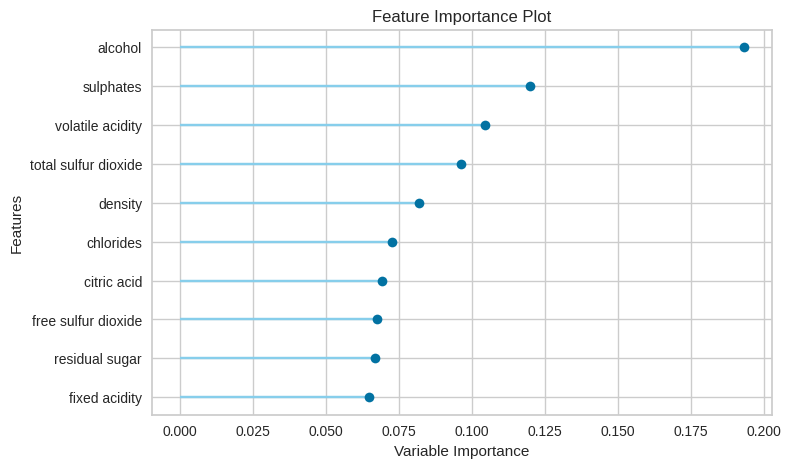

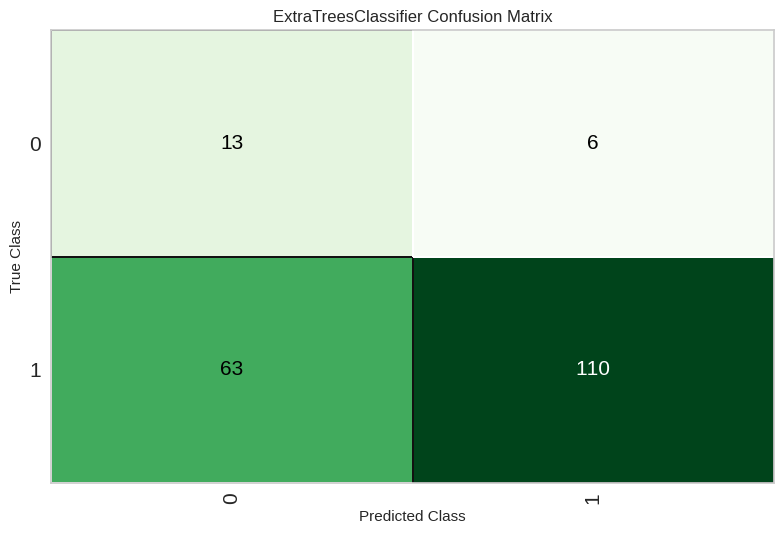

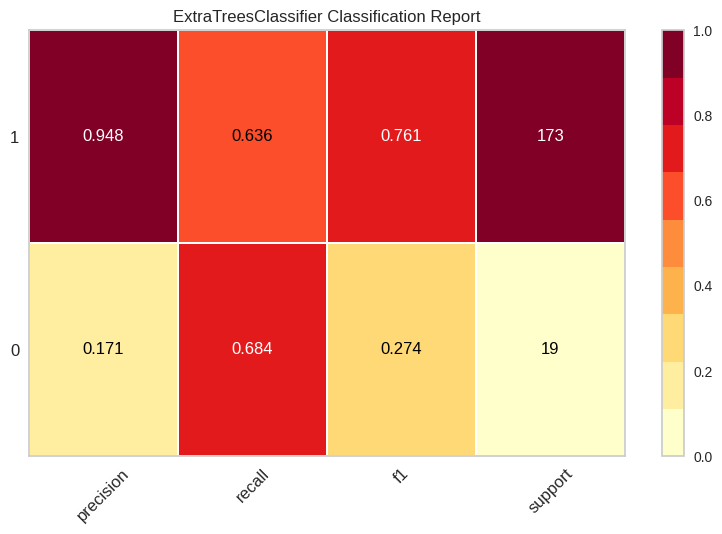

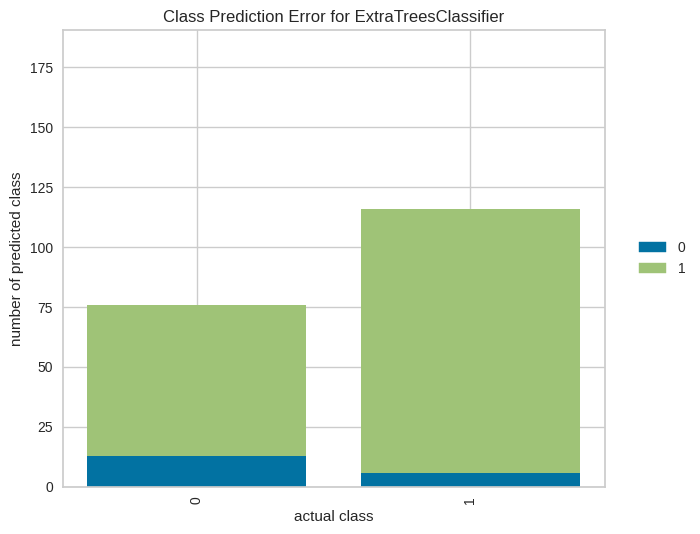

In [68]:
print("Best Model for Binary Classification bins [0, 5.5, 10]")
print(best_exp1)
plot_model(best_exp1, plot = 'feature')
plot_model(best_exp1, plot = 'confusion_matrix')
plot_model(best_exp1, plot = 'class_report')
plot_model(best_exp1, plot = 'error')

Best Model for Binary Classification bins [0, 5.5, 10] with outliers removed
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=1627, verbose=0, warm_start=False)


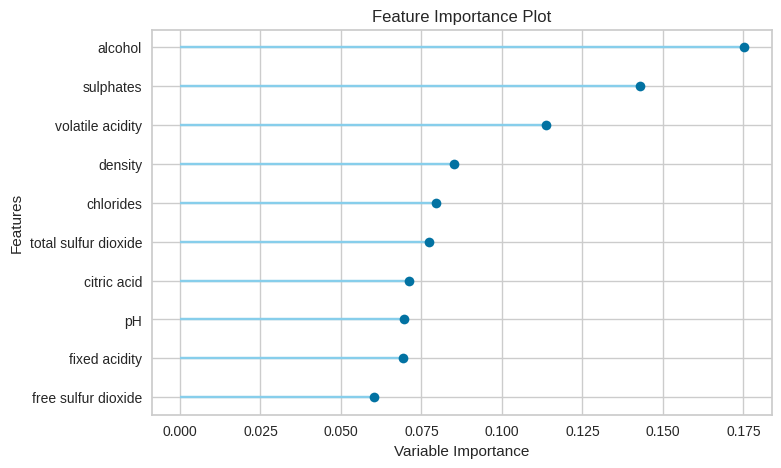

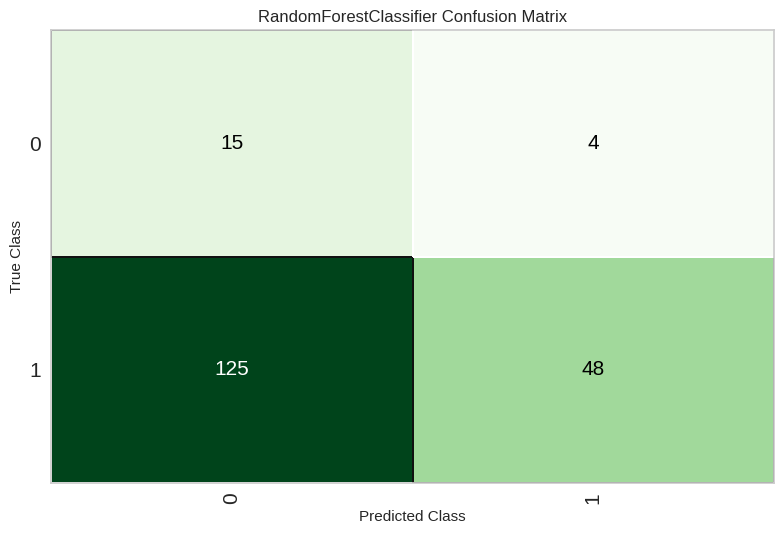

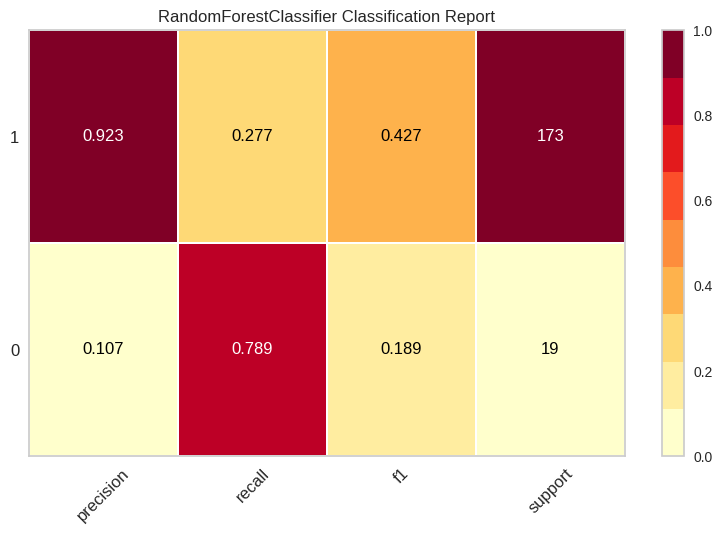

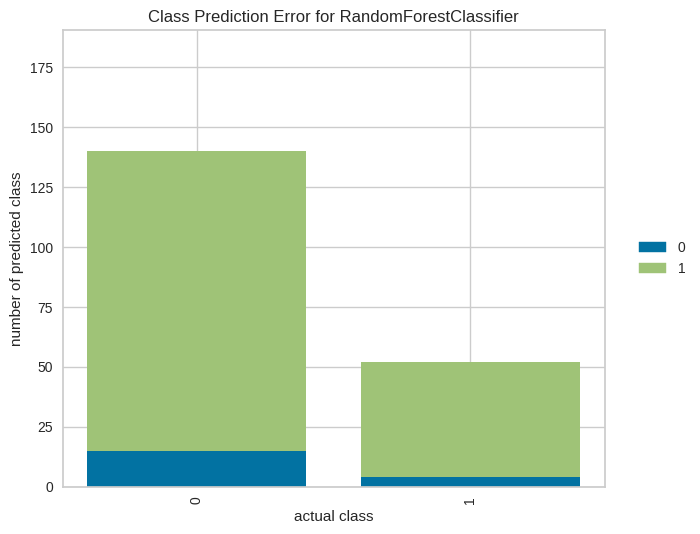

In [69]:
print("Best Model for Binary Classification bins [0, 5.5, 10] with outliers removed")
print(b_exp1_out)
plot_model(b_exp1_out, plot = 'feature')
plot_model(b_exp1_out, plot = 'confusion_matrix')
plot_model(b_exp1_out, plot = 'class_report')
plot_model(b_exp1_out, plot = 'error')

Best Model for Binary Classification bins [0, 6.5, 10]
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=6631, verbose=0, warm_start=False)


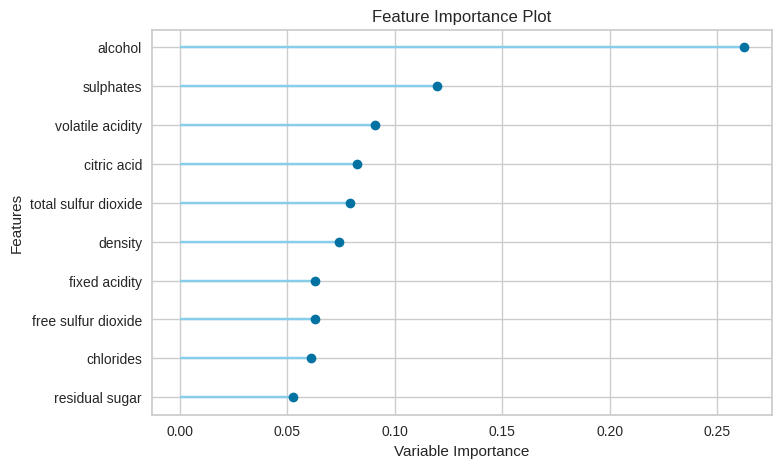

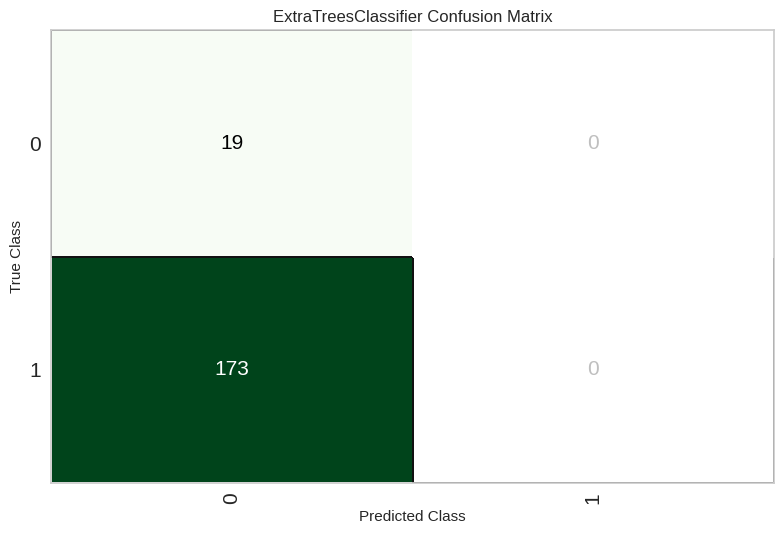

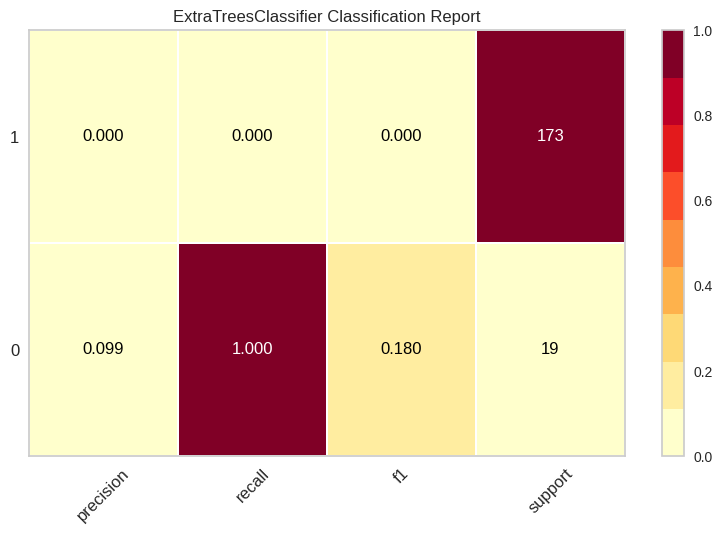

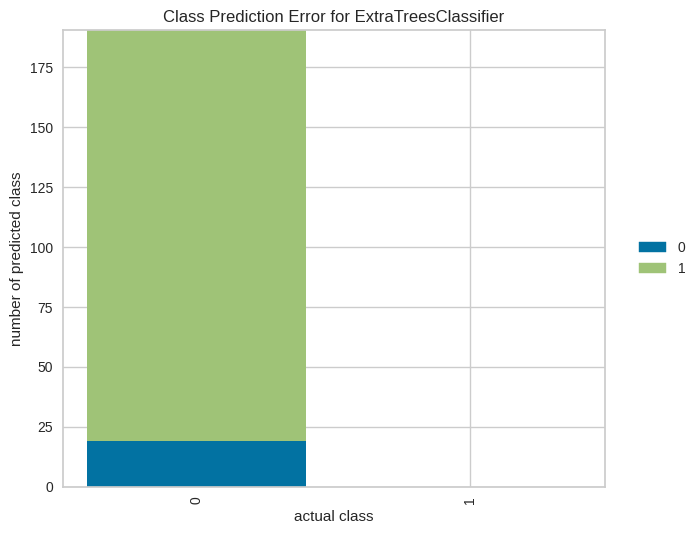

In [70]:
print("Best Model for Binary Classification bins [0, 6.5, 10]")
print(best_exp2)
plot_model(best_exp2, plot = 'feature')
plot_model(best_exp2, plot = 'confusion_matrix')
plot_model(best_exp2, plot = 'class_report')
plot_model(best_exp2, plot = 'error')

Best Model for Binary Classification bins [0, 6.5, 10] with outliers removed
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=5721, verbose=0, warm_start=False)


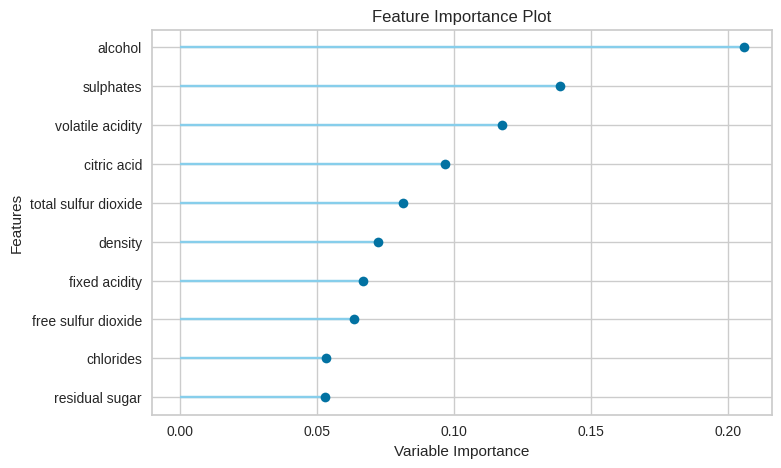

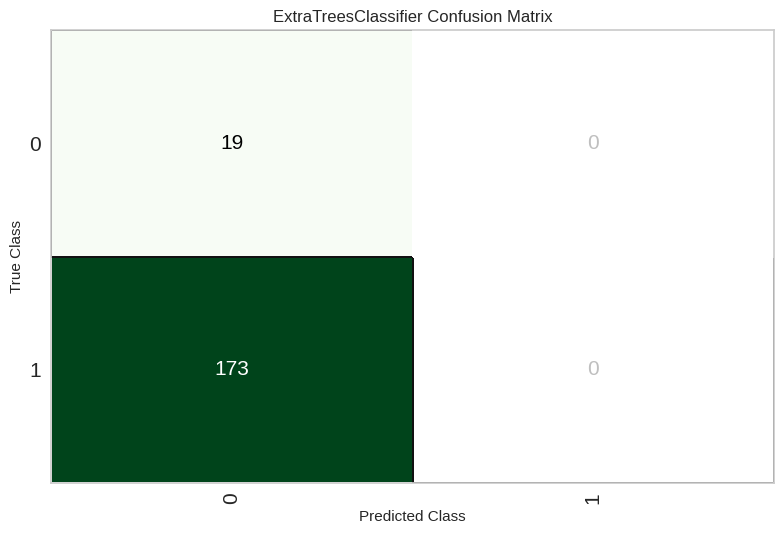

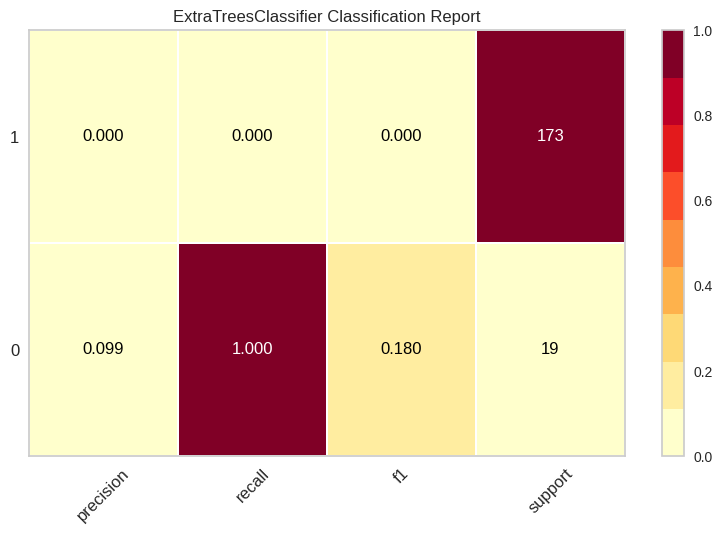

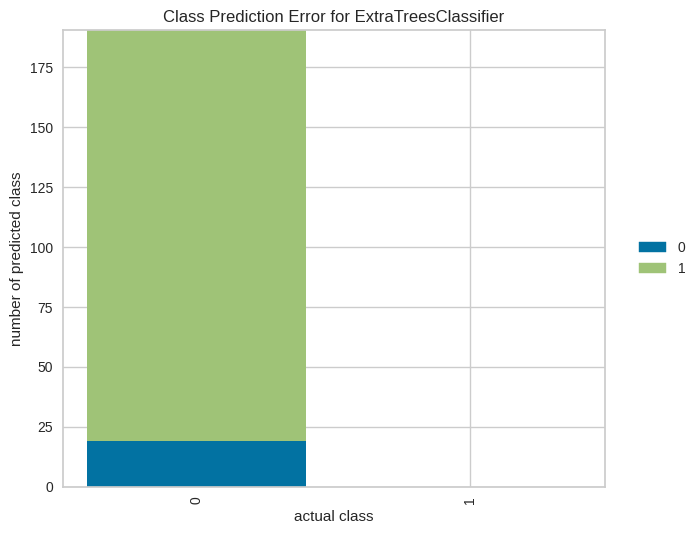

In [71]:
print("Best Model for Binary Classification bins [0, 6.5, 10] with outliers removed")
print(b_exp2_out)
plot_model(b_exp2_out, plot = 'feature')
plot_model(b_exp2_out, plot = 'confusion_matrix')
plot_model(b_exp2_out, plot = 'class_report')
plot_model(b_exp2_out, plot = 'error')

Best model for differentiang quality only amongst high quality wines
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=2998, verbose=0, warm_start=False)


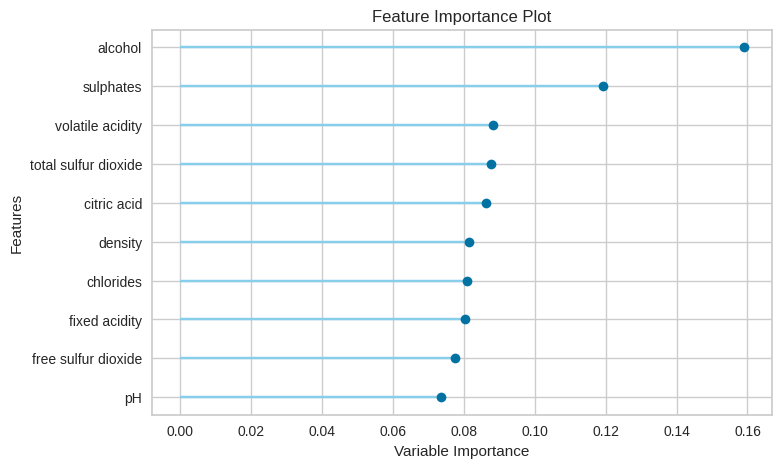

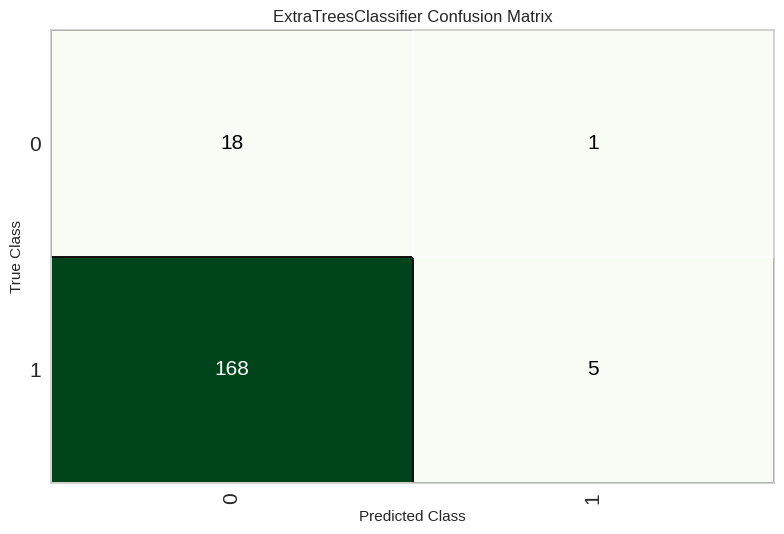

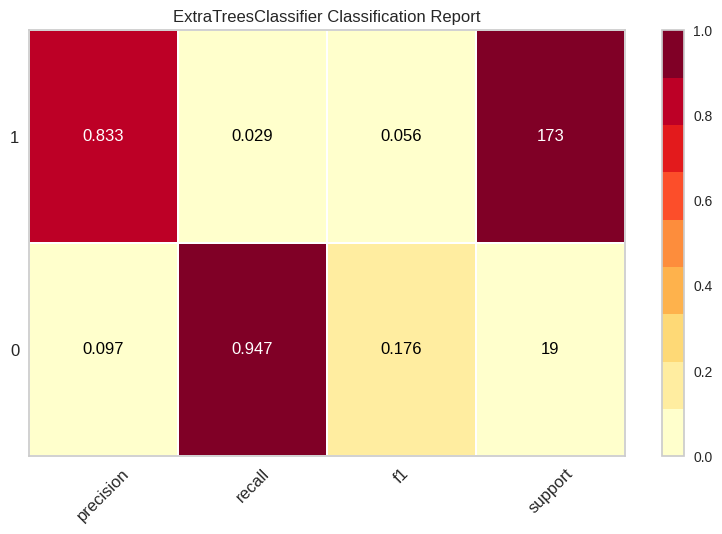

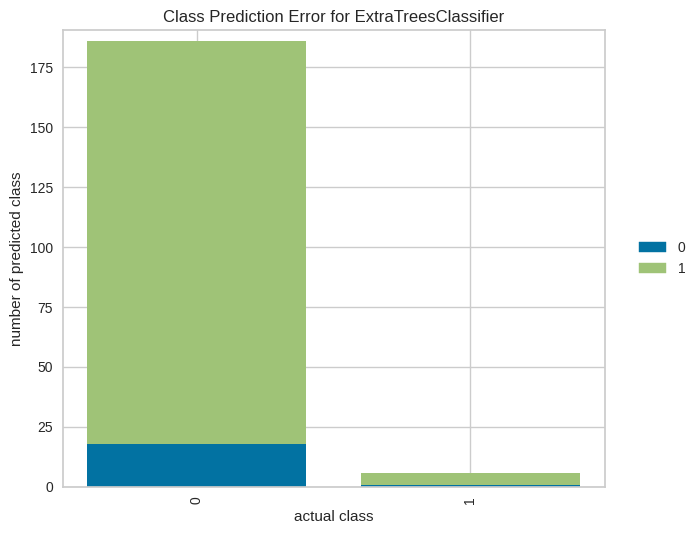

In [72]:
print("Best model for differentiang quality only amongst high quality wines")
print(best_hq)
plot_model(best_hq, plot = 'feature')
plot_model(best_hq, plot = 'confusion_matrix')
plot_model(best_hq, plot = 'class_report')
plot_model(best_hq, plot = 'error')

Best model for differentiang quality only amongst low quality wines
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=2570, verbose=0, warm_start=False)


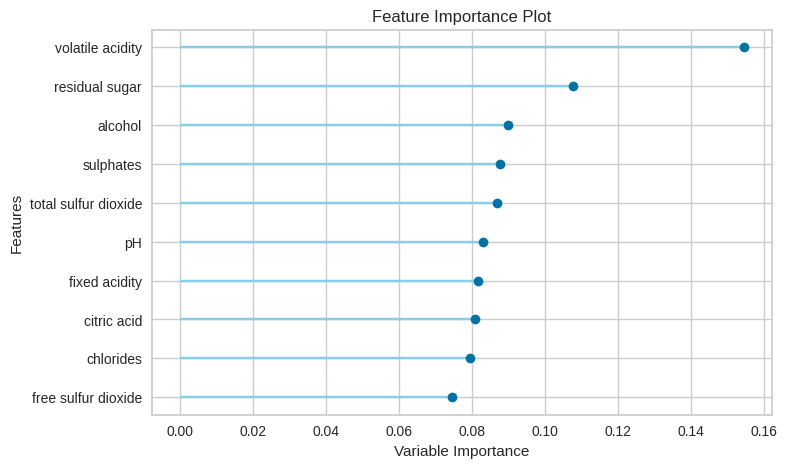

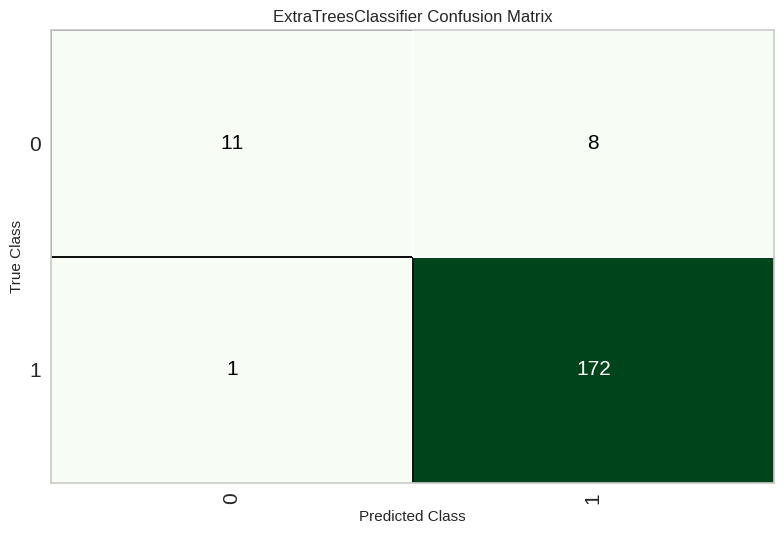

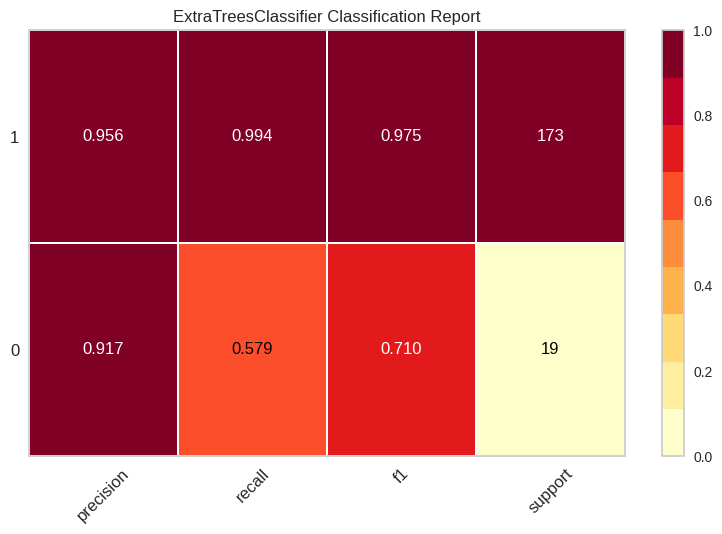

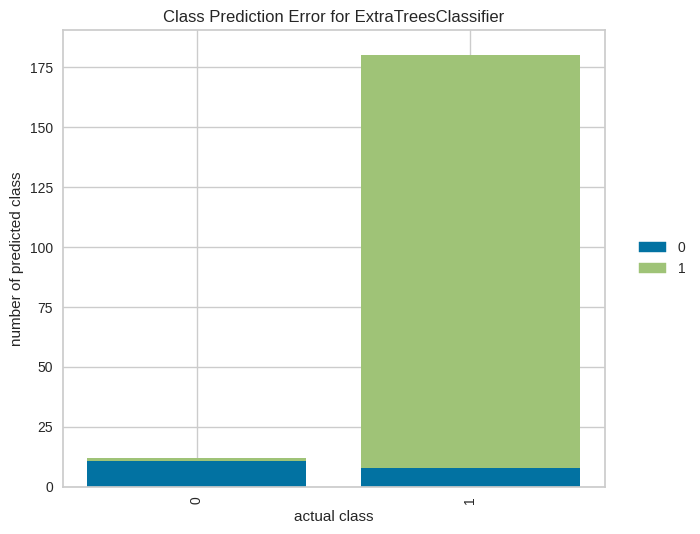

In [73]:
print("Best model for differentiang quality only amongst low quality wines")
print(Best_lq)
plot_model(Best_lq, plot = 'feature')
plot_model(Best_lq, plot = 'confusion_matrix')
plot_model(Best_lq, plot = 'class_report')
plot_model(Best_lq, plot = 'error')

Best model for multiclass classification of wine by qualities [0, 5.5, 7.5, 10]
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=4442, verbose=0, warm_start=False)


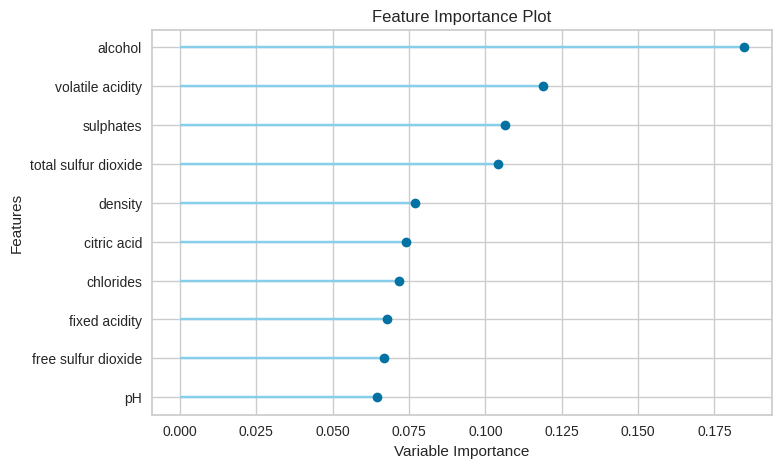

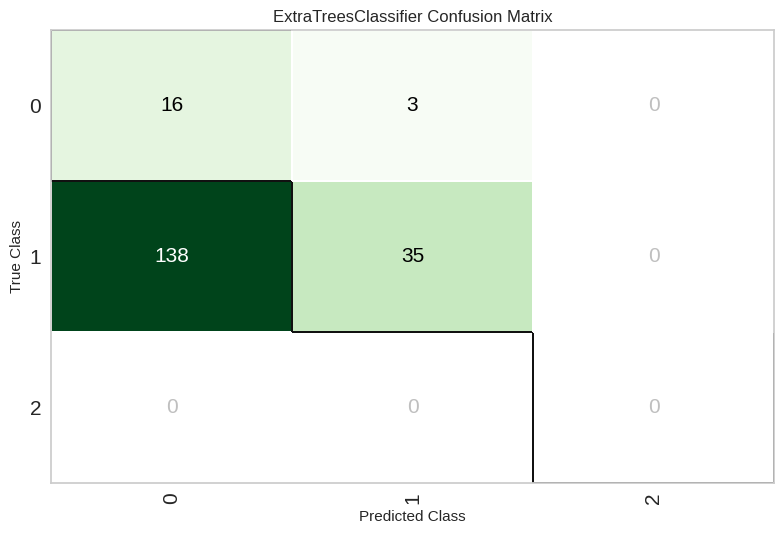

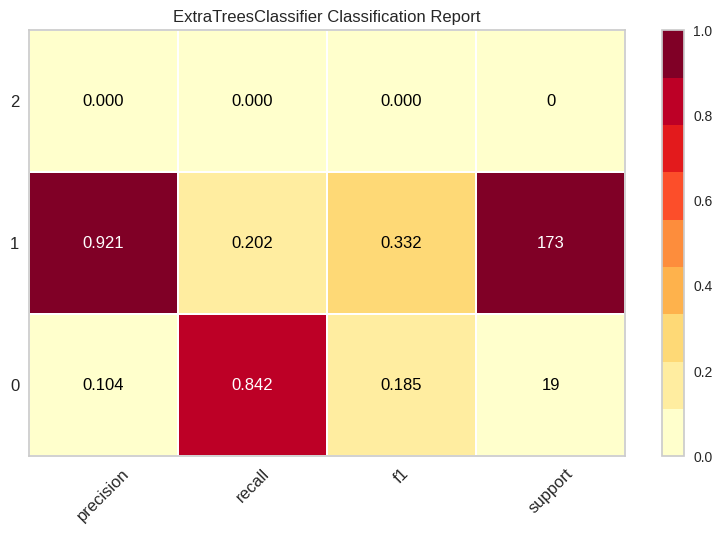

In [75]:
print("Best model for multiclass classification of wine by qualities [0, 5.5, 7.5, 10]")
print(best_exp3)
plot_model(best_exp3, plot = 'feature')
plot_model(best_exp3, plot = 'confusion_matrix')
plot_model(best_exp3, plot = 'class_report')

In [100]:
#Tuning Models
Tune_exp1 = tune_model(best_exp1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.7468,0.6078,0.7209,0.6596,0.3376,0.3424
1,0.8211,0.8480,0.8039,0.8542,0.8283,0.6418,0.6431
2,0.8316,0.8512,0.8431,0.8431,0.8431,0.6613,0.6613
3,0.8105,0.8791,0.8200,0.8200,0.8200,0.6200,0.6200
4,0.6632,0.7991,0.6800,0.6800,0.6800,0.3244,0.3244
5,0.7474,0.8218,0.7400,0.7708,0.7551,0.4945,0.4949
6,0.6737,0.7160,0.5800,0.7436,0.6517,0.3535,0.3631
7,0.7474,0.8493,0.6400,0.8421,0.7273,0.5000,0.5164
8,0.7789,0.8838,0.7400,0.8222,0.7789,0.5591,0.5622


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [101]:
#Tuning Models
Tune_exp2 = tune_model(b_exp1_out)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6771,0.7582,0.7059,0.6923,0.6990,0.3508,0.3509
1,0.8211,0.8815,0.8627,0.8148,0.8381,0.6385,0.6398
2,0.8000,0.8654,0.8235,0.8077,0.8155,0.5972,0.5973
3,0.7368,0.8587,0.7600,0.7451,0.7525,0.4716,0.4717
4,0.6632,0.7844,0.7000,0.6731,0.6863,0.3229,0.3232
5,0.7053,0.7818,0.7400,0.7115,0.7255,0.4076,0.4079
6,0.7053,0.7484,0.6800,0.7391,0.7083,0.4115,0.4130
7,0.7789,0.8804,0.7400,0.8222,0.7789,0.5591,0.5622
8,0.7895,0.9004,0.8000,0.8000,0.8000,0.5778,0.5778


In [102]:
#Tuning Models
Tune_exp3 = tune_model(best_exp2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6979,0.7669,0.7059,0.7200,0.7129,0.3943,0.3943
1,0.8421,0.8623,0.8431,0.8600,0.8515,0.6830,0.6831
2,0.8211,0.8650,0.8235,0.8400,0.8317,0.6407,0.6409
3,0.7895,0.8804,0.8000,0.8000,0.8000,0.5778,0.5778
4,0.6211,0.7951,0.6600,0.6346,0.6471,0.2383,0.2385
5,0.7368,0.8120,0.7800,0.7358,0.7573,0.4705,0.4714
6,0.6632,0.7387,0.5800,0.7250,0.6444,0.3319,0.3393
7,0.7684,0.8684,0.7200,0.8182,0.7660,0.5386,0.5429
8,0.7789,0.8898,0.7600,0.8085,0.7835,0.5581,0.5593


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [103]:
#Tuning Models
Tune_exp4 = tune_model(b_exp2_out)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6979,0.7695,0.7059,0.7200,0.7129,0.3943,0.3943
1,0.8526,0.8699,0.8431,0.8776,0.8600,0.7046,0.7052
2,0.8316,0.8690,0.8235,0.8571,0.8400,0.6624,0.6630
3,0.8000,0.8760,0.8000,0.8163,0.8081,0.5993,0.5995
4,0.6105,0.7929,0.6400,0.6275,0.6337,0.2180,0.2181
5,0.7158,0.8071,0.7400,0.7255,0.7327,0.4294,0.4295
6,0.6632,0.7298,0.5800,0.7250,0.6444,0.3319,0.3393
7,0.7684,0.8716,0.7200,0.8182,0.7660,0.5386,0.5429
8,0.7368,0.8804,0.7400,0.7551,0.7475,0.4728,0.4729


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [104]:
#Tuning Models
Tune_exp5 = tune_model(best_exp3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6771,0.7595,0.6863,0.7000,0.6931,0.3525,0.3526
1,0.8421,0.8668,0.8235,0.8750,0.8485,0.6840,0.6853
2,0.8211,0.8645,0.8235,0.8400,0.8317,0.6407,0.6409
3,0.7895,0.8769,0.8200,0.7885,0.8039,0.5768,0.5774
4,0.6421,0.7956,0.7000,0.6481,0.6731,0.2790,0.2800
5,0.7579,0.8151,0.7800,0.7647,0.7723,0.5139,0.5140
6,0.6632,0.7378,0.5800,0.7250,0.6444,0.3319,0.3393
7,0.7579,0.8724,0.7000,0.8140,0.7527,0.5182,0.5239
8,0.7368,0.8844,0.7400,0.7551,0.7475,0.4728,0.4729


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [105]:
#Tuning Models
Tune_exp6 = tune_model(best_hq)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6771,0.7534,0.6667,0.7083,0.6869,0.3542,0.3549
1,0.8421,0.8427,0.8235,0.8750,0.8485,0.6840,0.6853
2,0.8211,0.8561,0.8235,0.8400,0.8317,0.6407,0.6409
3,0.8000,0.8724,0.8000,0.8163,0.8081,0.5993,0.5995
4,0.6316,0.7964,0.6400,0.6531,0.6465,0.2619,0.2620
5,0.7579,0.8280,0.7600,0.7755,0.7677,0.5150,0.5151
6,0.6316,0.7062,0.5200,0.7027,0.5977,0.2716,0.2822
7,0.7368,0.8396,0.6400,0.8205,0.7191,0.4786,0.4917
8,0.8000,0.8756,0.7800,0.8298,0.8041,0.6002,0.6014


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [106]:
#Tuning Models
Tune_exp7 = tune_model(Best_lq)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6875,0.7647,0.6863,0.7143,0.7000,0.3742,0.3745
1,0.8421,0.8654,0.8431,0.8600,0.8515,0.6830,0.6831
2,0.8421,0.8641,0.8235,0.8750,0.8485,0.6840,0.6853
3,0.7789,0.8760,0.8000,0.7843,0.7921,0.5562,0.5563
4,0.6211,0.7898,0.6600,0.6346,0.6471,0.2383,0.2385
5,0.7474,0.8129,0.7600,0.7600,0.7600,0.4933,0.4933
6,0.6632,0.7347,0.5800,0.7250,0.6444,0.3319,0.3393
7,0.7684,0.8698,0.7200,0.8182,0.7660,0.5386,0.5429
8,0.7579,0.8871,0.7400,0.7872,0.7629,0.5161,0.5171


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [107]:
print("Best model prediction for Binary split at 5.5")
predict_model(best_exp1)
predict_model(Tune_exp1)

Best model prediction for Binary split at 5.5


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9167,0.9823,0.8981,0.9417,0.9194,0.8332,0.8342


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7230,0.8206,0.7037,0.7562,0.7290,0.4466,0.4478


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
1126,5.8,0.29,0.26,1.7,0.063,3.0,11.0,0.99150,3.39,0.54,13.5,1,1,0.84
88,9.3,0.39,0.44,2.1,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,0,0,0.91
790,7.4,0.37,0.43,2.6,0.082,18.0,82.0,0.99708,3.33,0.68,9.7,1,0,0.70
1024,7.7,0.58,0.01,1.8,0.088,12.0,18.0,0.99568,3.32,0.56,10.5,1,1,0.70
683,8.1,0.78,0.23,2.6,0.059,5.0,15.0,0.99700,3.37,0.56,11.3,0,0,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,8.9,0.29,0.35,1.9,0.067,25.0,57.0,0.99700,3.18,1.36,10.3,1,1,0.78
171,8.0,0.42,0.17,2.0,0.073,6.0,18.0,0.99720,3.29,0.61,9.2,1,0,0.57
397,11.5,0.59,0.59,2.6,0.087,13.0,49.0,0.99880,3.18,0.65,11.0,1,1,0.70
74,9.7,0.32,0.54,2.5,0.094,28.0,83.0,0.99840,3.28,0.82,9.6,0,0,0.56


In [108]:
print("Best model prediction for Binary split at 5.5 with outliers removed")
predict_model(b_exp1_out)
predict_model(Tune_exp2)

Best model prediction for Binary split at 5.5 with outliers removed


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6225,0.6508,0.5648,0.6703,0.6131,0.2499,0.2534


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7402,0.8226,0.7222,0.7723,0.7464,0.4807,0.4818


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
1126,5.8,0.29,0.26,1.7,0.063,3.0,11.0,0.99150,3.39,0.54,13.5,1,1,0.73
88,9.3,0.39,0.44,2.1,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,0,0,0.93
790,7.4,0.37,0.43,2.6,0.082,18.0,82.0,0.99708,3.33,0.68,9.7,1,0,0.67
1024,7.7,0.58,0.01,1.8,0.088,12.0,18.0,0.99568,3.32,0.56,10.5,1,1,0.62
683,8.1,0.78,0.23,2.6,0.059,5.0,15.0,0.99700,3.37,0.56,11.3,0,0,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,8.9,0.29,0.35,1.9,0.067,25.0,57.0,0.99700,3.18,1.36,10.3,1,1,0.76
171,8.0,0.42,0.17,2.0,0.073,6.0,18.0,0.99720,3.29,0.61,9.2,1,0,0.56
397,11.5,0.59,0.59,2.6,0.087,13.0,49.0,0.99880,3.18,0.65,11.0,1,1,0.83
74,9.7,0.32,0.54,2.5,0.094,28.0,83.0,0.99840,3.28,0.82,9.6,0,0,0.66


In [109]:
print("Best model prediction for Binary split at 6.5")
predict_model(best_exp2)
predict_model(Tune_exp3)

Best model prediction for Binary split at 6.5


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6029,0.6377,0.2593,0.9655,0.4088,0.2380,0.3557


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7353,0.8256,0.7176,0.7673,0.7416,0.4709,0.4720


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
1126,5.8,0.29,0.26,1.7,0.063,3.0,11.0,0.99150,3.39,0.54,13.5,1,1,0.8459
88,9.3,0.39,0.44,2.1,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,0,0,0.8541
790,7.4,0.37,0.43,2.6,0.082,18.0,82.0,0.99708,3.33,0.68,9.7,1,0,0.5827
1024,7.7,0.58,0.01,1.8,0.088,12.0,18.0,0.99568,3.32,0.56,10.5,1,1,0.5359
683,8.1,0.78,0.23,2.6,0.059,5.0,15.0,0.99700,3.37,0.56,11.3,0,1,0.5103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,8.9,0.29,0.35,1.9,0.067,25.0,57.0,0.99700,3.18,1.36,10.3,1,1,0.7088
171,8.0,0.42,0.17,2.0,0.073,6.0,18.0,0.99720,3.29,0.61,9.2,1,0,0.5951
397,11.5,0.59,0.59,2.6,0.087,13.0,49.0,0.99880,3.18,0.65,11.0,1,1,0.6655
74,9.7,0.32,0.54,2.5,0.094,28.0,83.0,0.99840,3.28,0.82,9.6,0,0,0.6094


In [110]:
print("Best model prediction for Binary split at 6.5 with outliers removed")
predict_model(b_exp2_out)
predict_model(Tune_exp4)

Best model prediction for Binary split at 6.5 with outliers removed


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6029,0.6296,0.2593,0.9655,0.4088,0.2380,0.3557


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7353,0.8277,0.7315,0.7596,0.7453,0.4700,0.4703


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
1126,5.8,0.29,0.26,1.7,0.063,3.0,11.0,0.99150,3.39,0.54,13.5,1,1,0.81
88,9.3,0.39,0.44,2.1,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,0,0,0.92
790,7.4,0.37,0.43,2.6,0.082,18.0,82.0,0.99708,3.33,0.68,9.7,1,0,0.71
1024,7.7,0.58,0.01,1.8,0.088,12.0,18.0,0.99568,3.32,0.56,10.5,1,1,0.68
683,8.1,0.78,0.23,2.6,0.059,5.0,15.0,0.99700,3.37,0.56,11.3,0,0,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,8.9,0.29,0.35,1.9,0.067,25.0,57.0,0.99700,3.18,1.36,10.3,1,1,0.67
171,8.0,0.42,0.17,2.0,0.073,6.0,18.0,0.99720,3.29,0.61,9.2,1,0,0.56
397,11.5,0.59,0.59,2.6,0.087,13.0,49.0,0.99880,3.18,0.65,11.0,1,1,0.79
74,9.7,0.32,0.54,2.5,0.094,28.0,83.0,0.99840,3.28,0.82,9.6,0,0,0.58


In [111]:
print("Best model prediction for Binary split at examining only high quality wines scored 6 and above")
predict_model(best_hq)
predict_model(Tune_exp6)

Best model prediction for Binary split at examining only high quality wines scored 6 and above


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.4730,0.5293,0.0463,0.5263,0.0851,-0.0005,-0.0014


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7500,0.8319,0.7222,0.7879,0.7536,0.5009,0.5028


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
1126,5.8,0.29,0.26,1.7,0.063,3.0,11.0,0.99150,3.39,0.54,13.5,1,1,0.84
88,9.3,0.39,0.44,2.1,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,0,0,0.91
790,7.4,0.37,0.43,2.6,0.082,18.0,82.0,0.99708,3.33,0.68,9.7,1,0,0.69
1024,7.7,0.58,0.01,1.8,0.088,12.0,18.0,0.99568,3.32,0.56,10.5,1,1,0.70
683,8.1,0.78,0.23,2.6,0.059,5.0,15.0,0.99700,3.37,0.56,11.3,0,0,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,8.9,0.29,0.35,1.9,0.067,25.0,57.0,0.99700,3.18,1.36,10.3,1,1,0.72
171,8.0,0.42,0.17,2.0,0.073,6.0,18.0,0.99720,3.29,0.61,9.2,1,0,0.66
397,11.5,0.59,0.59,2.6,0.087,13.0,49.0,0.99880,3.18,0.65,11.0,1,1,0.71
74,9.7,0.32,0.54,2.5,0.094,28.0,83.0,0.99840,3.28,0.82,9.6,0,0,0.61


In [112]:
print("Best model prediction for Binary split at examining only low quality wines scored 5 and below")
predict_model(Best_lq)
predict_model(Tune_exp7)

Best model prediction for Binary split at examining only low quality wines scored 5 and below


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.5294,0.6189,1.0000,0.5294,0.6923,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7377,0.8237,0.7222,0.7685,0.7446,0.4756,0.4766


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
1126,5.8,0.29,0.26,1.7,0.063,3.0,11.0,0.99150,3.39,0.54,13.5,1,1,0.8287
88,9.3,0.39,0.44,2.1,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,0,0,0.8359
790,7.4,0.37,0.43,2.6,0.082,18.0,82.0,0.99708,3.33,0.68,9.7,1,0,0.6087
1024,7.7,0.58,0.01,1.8,0.088,12.0,18.0,0.99568,3.32,0.56,10.5,1,1,0.5357
683,8.1,0.78,0.23,2.6,0.059,5.0,15.0,0.99700,3.37,0.56,11.3,0,1,0.5364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,8.9,0.29,0.35,1.9,0.067,25.0,57.0,0.99700,3.18,1.36,10.3,1,1,0.7088
171,8.0,0.42,0.17,2.0,0.073,6.0,18.0,0.99720,3.29,0.61,9.2,1,0,0.5966
397,11.5,0.59,0.59,2.6,0.087,13.0,49.0,0.99880,3.18,0.65,11.0,1,1,0.6624
74,9.7,0.32,0.54,2.5,0.094,28.0,83.0,0.99840,3.28,0.82,9.6,0,0,0.6101


In [113]:
print("Best model prediction for Multiclass scoring of wines into low (0-5), medium (6), or high (7 and above) wines")
predict_model(best_exp3)
predict_model(Tune_exp5)

Best model prediction for Multiclass scoring of wines into low (0-5), medium (6), or high (7 and above) wines


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.5270,0.6580,0.2685,0.6237,0.3754,0.0833,0.1026


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7426,0.8247,0.7130,0.7817,0.7458,0.4863,0.4884


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
1126,5.8,0.29,0.26,1.7,0.063,3.0,11.0,0.99150,3.39,0.54,13.5,1,1,0.8368
88,9.3,0.39,0.44,2.1,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,0,0,0.8421
790,7.4,0.37,0.43,2.6,0.082,18.0,82.0,0.99708,3.33,0.68,9.7,1,0,0.5928
1024,7.7,0.58,0.01,1.8,0.088,12.0,18.0,0.99568,3.32,0.56,10.5,1,1,0.5195
683,8.1,0.78,0.23,2.6,0.059,5.0,15.0,0.99700,3.37,0.56,11.3,0,1,0.5223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,8.9,0.29,0.35,1.9,0.067,25.0,57.0,0.99700,3.18,1.36,10.3,1,1,0.6946
171,8.0,0.42,0.17,2.0,0.073,6.0,18.0,0.99720,3.29,0.61,9.2,1,0,0.5989
397,11.5,0.59,0.59,2.6,0.087,13.0,49.0,0.99880,3.18,0.65,11.0,1,1,0.6703
74,9.7,0.32,0.54,2.5,0.094,28.0,83.0,0.99840,3.28,0.82,9.6,0,0,0.5869


In [122]:
save_model(best_exp1, model_name='Red_Wine_Classification_Quality_5.5')
save_model(Tune_exp6, model_name='High_Quality_Classification_Tuned')
save_model(Tune_exp7, model_name='Low_Quality_Classification_Tuned')
save_model(Tune_exp5, model_name='Mutlticlass_Classification_Tuned')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates', 'alcohol'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feature...
                 ('trained_model',
                  ExtraTreesClassifier(bootstrap=True, ccp_alpha